## Library

In [458]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

from copy import copy
from scipy import stats
from pprint import pprint

exec(open('library.py').read())
print('Loaded')

Loaded
Loaded


## Variables (customize these)

In [459]:
# Customize these!!!

# Global variables - probably don't want to change these but you could.
RUNS = 10000                                      # Number of runs to do (default 1000)
CURRENT_YEAR = 2022                               # What year to start the run on? (default: 2022)
MAX_YEAR = 2222                                   # What year to end the run on? (default: 2100)
USE_NUMBERS = 'Wildeford'                         # Which variable set (see below) to use?
GRAPH_P = 80                                      # What percentile to graph on the graphs below? (default: 50)


# Variable sets - definitely change these!
if USE_NUMBERS == 'Cotra':
    initial_gdp = 21 * trillion                    # GDP in `CURRENT_YEAR` of country that will develop TAI (default: 21.3 trillion)
    tai_flop_size = lognorm(27.58, 46.29)          # 90% CI, it takes 10^FLOPs to run a transformative AI at inference.
                                                   # Note: A petaflop/s-day (pfs-day) consists of performing 10^15 neural net operations per second for one day, or a total of about 10^20 operations
    algo_doubling_rate = norm(2.5, 2.5)            # 90% CI, algorithms get twice as efficient every X years
    min_reduction = norm(2, 2)                     # 90% CI, the minimum amount of OOMs of reduction in TAI size algorithm improvements could acheive
    max_reduction = norm(5, 5)                     # 90% CI, the maximum amount of OOMs of reduction in TAI size algorithm improvements could acheive
    initial_flops_per_dollar = norm(17.2, 17.2)    # 90% CI, as of today, we can buy 10^X FLOPs per $
    flops_halving_rate = norm(2.6, 3)              # 90% CI, the cost of FLOPs per $ halves every X years
    max_flops_per_dollar = norm(24, 24)            # 90% CI, the cheapest FLOPs will get is 10^X FLOPs per $
    initial_pay = norm(8.7, 8.7)                   # 90% CI, as of today the maximum we would pay for TAI is $10^X
    gdp_growth = norm(1.03, 1.03)                  # 90% CI, GDP will increase by a factor of X each year
    max_gdp_frac = norm(0.01, 0.01)                # 90% CI, the maximum % of GDP that would be spent on TAI is $10^X
    p_willingness_ramp = 0                         # What is the probability that, if we were close to TAI, we would suddenly ramp up spending?
    willingness_ramp = norm(1, 1)                  # 90% CI, if we are X% of the spend needed to acheive TAI, we will instantly jump to TAI
    spend_doubling_time = norm(2.5, 2.5)           # 90% CI, our willingness to spend on TAI doubles every X years
    initial_chance_of_nonscaling_issue = 0         # What is the chance there will be a non-scaling issue if TAI is feasible in `CURRENT_YEAR`?
    final_chance_of_nonscaling_issue = 0           # What is the chance there will be a non-scaling issue if TAI is feasible only by `nonscaling_issue_bottom_year` (see below)?
    nonscaling_issue_bottom_year = 0               # What year will will the chance of a non-scaling issue bottom out at (reaching `final_chance_of_nonscaling_issue`)?
    nonscaling_delay = norm(0, 0)                  # 90% CI, conditional on a delay, how many additional years will TAI be delayed due to issues unrelated to scaling to an adequate number of FLOPs (e.g., collecting the relevant training data)?
    base_p_recursive = 0                           # We assume the likelihood of seeing some recursive self-improvement loop increases as we get closer to TAI-level. What is the probability of such a loop at the max?
    recursive_curve_steepness = 0                  # How steep does the probability of recursive self-improvement increase with an increased amount of FLOP relative to the FLOP needed for TAI?
    recursive_curve_inflection = 0                 # How early in the ratio of FLOP present to FLOP needed for TAI does recursive self-improvement start (defining logistic curve)?
    p_recursive_creates_tai_instantly = 0          # If a recursive self-improvement loop is initiated, how likely is it to create full TAI within the year?
    recursive_flops_halving_rate_ = None           # If a recursive self-improvement loop is initiated, what does the FLOP halving rate become? (Assume now AI are potentially designing chips)
    recursive_algo_doubling_rate_ = None           # If a recursive self-improvement loop is initiated, what does the algorithm doubling rate become? (Assume now AI are potentially designing algorithms)
    recursive_spend_doubling_time = None           # If a recursive self-improvement loop is initiated, what does our spend doubling time become? (Assume now AIs can potntailly design profitable products) 
    recursive_gdp_growth_ = None                   # If a recursive self-improvement loop is initiated, what does our GDP growth rate become? (Assume now AIs can potntailly design profitable products)
    recursive_initial_chance_of_nonscaling_issue = None  # If a recursive self-improvement loop is initiated, what does `initial_chance_of_nonscaling_issue` become? (Assume now AIs can try to solve scaling issues)
    recursive_final_chance_of_nonscaling_issue = None    # If a recursive self-improvement loop is initiated, what does `final_chance_of_nonscaling_issue` become? (Assume now AIs can try to solve scaling issues)

elif USE_NUMBERS == 'Wildeford':
    initial_gdp = 21 * trillion
    tai_flop_size = lognorm(26, 46)
    algo_doubling_rate = norm_lclip(1.5, 5)
    min_reduction = norm(1, 3)
    max_reduction = norm(4, 8)
    initial_flops_per_dollar = norm(17, 17.5)
    flops_halving_rate = norm(2, 4)
    max_flops_per_dollar = norm(22, 27)
    initial_pay = norm(7, 8)
    gdp_growth = norm(1.015, 1.03)
    max_gdp_frac = lognorm_lclip(0.00006, 0.002)
    p_willingness_ramp = 0.1
    willingness_ramp = norm(0.3, 0.9)
    spend_doubling_time = lognorm_lclip(0.5, 3)
    initial_chance_of_nonscaling_issue = 0.9
    final_chance_of_nonscaling_issue = 0.1
    nonscaling_issue_bottom_year = 2060
    nonscaling_delay = lognorm(1, 20)
    base_p_recursive = 0.5
    recursive_curve_steepness = 35
    recursive_curve_inflection = 0.1
    p_recursive_creates_tai_instantly = 0.05
    recursive_flops_halving_rate = lognorm_lclip(0.3, 2)
    recursive_algo_doubling_rate = lognorm_lclip(0.3, 2)
    recursive_spend_doubling_time = lognorm_lclip(0.3, 2)
    recursive_gdp_growth = lognorm_lclip(1.02, 1.1)
    recursive_initial_chance_of_nonscaling_issue = 0.2
    recursive_final_chance_of_nonscaling_issue = 0.01
    
elif USE_NUMBERS == 'Kokotajlo':
    initial_gdp = 21 * trillion
    tai_flop_size = lognorm(22, 39)
    algo_doubling_rate = norm_lclip(1, 3)
    min_reduction = norm(1, 3)
    max_reduction = norm(4, 8)
    initial_flops_per_dollar = norm(17, 17.5)
    flops_halving_rate = norm_lclip(1, 3)
    max_flops_per_dollar = norm(22, 27)
    initial_pay = norm(7, 8)
    gdp_growth = norm(1.015, 1.03)
    max_gdp_frac = lognorm_lclip(0.00006, 0.002)
    p_willingness_ramp = 1
    willingness_ramp = norm(0.1, 0.1)
    spend_doubling_time = lognorm_lclip(0.5, 2)
    initial_chance_of_nonscaling_issue = 0
    final_chance_of_nonscaling_issue = 0
    nonscaling_issue_bottom_year = 2060
    nonscaling_delay = lognorm(1, 20)
    base_p_recursive = 0.5
    recursive_curve_steepness = 35
    recursive_curve_inflection = 0.1
    p_recursive_creates_tai_instantly = 0.05
    recursive_flops_halving_rate = lognorm_lclip(0.3, 2)
    recursive_algo_doubling_rate = lognorm_lclip(0.3, 2)
    recursive_spend_doubling_time = lognorm_lclip(0.3, 2)
    recursive_gdp_growth = lognorm_lclip(1.02, 1.1)
    recursive_initial_chance_of_nonscaling_issue = 0.2
    recursive_final_chance_of_nonscaling_issue = 0.01
    
else:
    raise ValueError


# These equations define how variables change over time or in relationship to other variables.
def gdp(initial_gdp, gdp_growth, year):
    return initial_gdp * (gdp_growth ** year)

def willingness_to_pay(initial_gdp, gdp_growth, initial_pay, spend_doubling_time, max_gdp_frac, year):
    gdp_ = gdp(initial_gdp=initial_gdp, gdp_growth=gdp_growth, year=year)
    x = (np.log(2) / spend_doubling_time) * year
    if x < 709:
        return 10 ** (math.log10(initial_pay) + math.log10(math.exp(x)) - math.log10(1 + initial_pay / (gdp_ * max_gdp_frac) * math.exp(x)))
    else: # Handle math.exp and math.log10 overflow errors
        return 10 ** int(math.log10(initial_pay) + (year/spend_doubling_time)/3.3)

def possible_algo_reduction_fn(min_reduction, max_reduction, tai_flop_size):
    return min(max(min_reduction + round((tai_flop_size - 32) / 4), min_reduction), max_reduction)

def flops_needed(initial_flops, possible_reduction, doubling_rate, year):
    x = (np.log(2) / doubling_rate) * year
    if x < 709:
        return 10 ** (math.log10(initial_flops) - max(math.log10(math.exp(x)) - math.log10(1 + (1/possible_reduction) * math.exp(x)), 0))
    else: # Handle math.exp and math.log10 overflow errors
        return 10 ** int(math.log10(initial_flops) - (1/possible_reduction))

def flops_per_dollar(initial_flops_per_dollar, max_flops_per_dollar, halving_rate, year):
    x = (np.log(2) / halving_rate) * year
    if x < 709:
        return 10 ** (math.log10(initial_flops_per_dollar) + math.log10(math.exp(x)) - math.log10(1 + initial_flops_per_dollar / max_flops_per_dollar * math.exp(x)))
    else: # Handle math.exp and math.log10 overflow errors
        return 10 ** int(math.log10(initial_flops_per_dollar) + (year/halving_rate)/3.3)

def cost_of_tai(initial_flops, possible_reduction, algo_doubling_rate, initial_flops_per_dollar, max_flops_per_dollar,
                flops_halving_rate, year):
    return (flops_needed(initial_flops, possible_reduction, algo_doubling_rate, year) /
            flops_per_dollar(initial_flops_per_dollar, max_flops_per_dollar, flops_halving_rate, year))

def flops_at_max(initial_gdp, gdp_growth, initial_pay, spend_doubling_time, max_gdp_frac,
                 initial_flops_per_dollar, max_flops_per_dollar, flops_halving_rate, year):
    return (willingness_to_pay(initial_gdp=initial_gdp,
                               gdp_growth=gdp_growth,
                               initial_pay=initial_pay,
                               spend_doubling_time=spend_doubling_time,
                               max_gdp_frac=0.01,
                               year=year) *
            flops_per_dollar(initial_flops_per_dollar, max_flops_per_dollar, flops_halving_rate, year))

def p_nonscaling_delay(initial_p, final_p, year, max_year):
    initial_p = initial_p - final_p
    p_ = initial_p - (initial_p * ((year - CURRENT_YEAR) / (max_year - CURRENT_YEAR))) + final_p
    return final_p if p_ < final_p else p_

def p_rapid_recursive_self_improvement(flops_needed_for_tai, flops_we_have, base_p, curve_steepness, curve_inflection):
    if flops_we_have > 10 ** 250:
        return base_p  # Handle overflow error
    else:
        ratio = flops_we_have / flops_needed_for_tai
        return base_p / (1 + math.exp(-curve_steepness * (ratio - curve_inflection)))

    
# ------------- Ignore below here ------------
years = list(range(CURRENT_YEAR, MAX_YEAR))
print('Loaded')


Loaded


In [460]:
initial_flops_p = get_percentiles([sample(tai_flop_size) for s in range(1000)], reverse=True)
initial_flops_p

{95: 26.13480166240813,
 90: 28.01456497033604,
 80: 29.93317279175708,
 70: 31.649433784173187,
 60: 33.53145379768342,
 50: 35.19072880651204,
 40: 36.48681252636159,
 30: 38.03750933872201,
 20: 40.47016516841682,
 10: 44.214242524297205,
 5: 47.42708210976534}

In [461]:
min_reduction_p = get_percentiles([sample(min_reduction) for s in range(1000)], reverse=True)
min_reduction_p

{95: 1.0112750123594458,
 90: 1.1983949717647429,
 80: 1.4811135820654227,
 70: 1.7008052470373487,
 60: 1.8589897769997983,
 50: 2.032406553856437,
 40: 2.193900339023321,
 30: 2.3471055047845253,
 20: 2.5279944510646937,
 10: 2.797171037401622,
 5: 3.0778598665182186}

In [462]:
max_reduction_p = get_percentiles([sample(max_reduction) for s in range(1000)], reverse=True)
max_reduction_p

{95: 3.93874218297333,
 90: 4.428378429078184,
 80: 4.951814894634843,
 70: 5.383453574329647,
 60: 5.744544872163861,
 50: 6.02643588195467,
 40: 6.332454134466718,
 30: 6.641726774199119,
 20: 7.090655595506734,
 10: 7.601499653594259,
 5: 8.012524091490567}

In [463]:
algo_doubling_rate_p = get_percentiles([sample(algo_doubling_rate) for s in range(1000)], reverse=True)
algo_doubling_rate_p

{95: 1.5,
 90: 1.822905598251408,
 80: 2.3652530792253845,
 70: 2.73713244432553,
 60: 3.0128735482357816,
 50: 3.322682922290219,
 40: 3.589047927597275,
 30: 3.9037645544086113,
 20: 4.205671230407155,
 10: 4.674975399714541,
 5: 5.076652693593826}

In [464]:
initial_flops_per_dollar_p = get_percentiles([sample(initial_flops_per_dollar) for s in range(1000)])
initial_flops_per_dollar_p

{5: 17.000268519063404,
 10: 17.05185514310932,
 20: 17.12146484413663,
 30: 17.16804627842899,
 40: 17.210489908668183,
 50: 17.249456893587165,
 60: 17.29125262075803,
 70: 17.328313084656,
 80: 17.373870039464506,
 90: 17.437282177104347,
 95: 17.493082476576415}

In [465]:
flops_halving_rate_p = get_percentiles([sample(flops_halving_rate) for s in range(1000)], reverse=True)
flops_halving_rate_p

{95: 1.9719969361735121,
 90: 2.223814777888821,
 80: 2.516022084107756,
 70: 2.723486094896635,
 60: 2.8689664472636482,
 50: 3.0320071226950533,
 40: 3.167802712810865,
 30: 3.324836575816245,
 20: 3.504847202249349,
 10: 3.802362229615432,
 5: 4.029412699340602}

In [466]:
max_flops_per_dollar_p = get_percentiles([sample(max_flops_per_dollar) for s in range(1000)])
max_flops_per_dollar_p

{5: 21.928892741468715,
 10: 22.444632192205823,
 20: 23.20533486935013,
 30: 23.641325170671415,
 40: 24.04941661284972,
 50: 24.453043685252712,
 60: 24.855098507878168,
 70: 25.335178888960257,
 80: 25.795544308303846,
 90: 26.540746796058073,
 95: 27.000776417739896}

In [467]:
initial_pay_p = get_percentiles([sample(initial_pay) for s in range(1000)])
initial_pay_p

{5: 6.9737004844867005,
 10: 7.117258942302333,
 20: 7.263499034284205,
 30: 7.371312523850254,
 40: 7.453129756307697,
 50: 7.522501837315858,
 60: 7.594656530377002,
 70: 7.665083437290051,
 80: 7.7644030368586705,
 90: 7.880934609622743,
 95: 7.984166126549483}

In [468]:
gdp_growth_p = get_percentiles([sample(gdp_growth) for s in range(1000)])
gdp_growth_p

{5: 1.0153993586823067,
 10: 1.016662919310401,
 20: 1.0187504957424527,
 30: 1.0201985775162852,
 40: 1.021399812958906,
 50: 1.0224234407403476,
 60: 1.0236097943554334,
 70: 1.0249062283384478,
 80: 1.0265693857220763,
 90: 1.0284972809511737,
 95: 1.0305039661374544}

In [469]:
max_gdp_frac_p = get_percentiles([sample(max_gdp_frac) for s in range(1000)])
max_gdp_frac_p

{5: 6e-05,
 10: 8.530166835166633e-05,
 20: 0.00014345837136415225,
 30: 0.0001960682803629194,
 40: 0.0002733834874065566,
 50: 0.0003537367382785801,
 60: 0.0004544449870906719,
 70: 0.0006081509828558557,
 80: 0.0008568207355347414,
 90: 0.0014296906964768679,
 95: 0.0021376126121619332}

In [470]:
willingness_ramp_p = get_percentiles([sample(willingness_ramp) for s in range(1000)])
willingness_ramp_p

{5: 0.30763552119600956,
 10: 0.37067002200842186,
 20: 0.44312210349023223,
 30: 0.5028004434375577,
 40: 0.5512432965238119,
 50: 0.5981375669007534,
 60: 0.6506828663404057,
 70: 0.7012213847866998,
 80: 0.759985367786688,
 90: 0.8372404986975136,
 95: 0.8925349872798816}

In [471]:
spend_doubling_time_p = get_percentiles([sample(spend_doubling_time) for s in range(1000)], reverse=True)
spend_doubling_time_p

{95: 0.5295500110281327,
 90: 0.6347739215300479,
 80: 0.7844478668891661,
 70: 0.911764520612124,
 60: 1.0428517169500928,
 50: 1.2209686130911699,
 40: 1.396012022263537,
 30: 1.6123436627535717,
 20: 1.905155919629925,
 10: 2.4702720836215093,
 5: 3.1414721318991483}

In [472]:
nonscaling_delay_p = get_percentiles([sample(nonscaling_delay) for s in range(1000)], reverse=True)
nonscaling_delay_p

{95: 1.0501820693207973,
 90: 1.4881346895075735,
 80: 2.183492839662671,
 70: 2.7793133901516534,
 60: 3.6277676649867607,
 50: 4.551215281406238,
 40: 5.779425687676471,
 30: 7.158213635739344,
 20: 9.245558286624336,
 10: 13.831291366298435,
 5: 18.864160221539226}

In [473]:
if recursive_flops_halving_rate:
    recursive_flops_halving_rate_ = get_percentiles([sample(recursive_flops_halving_rate) for s in range(1000)])
    pprint(recursive_flops_halving_rate_)
else:
    print('N/A')


{5: 0.31398765609481805,
 10: 0.3819765313871887,
 20: 0.4887611762455311,
 30: 0.5718296611318927,
 40: 0.6715271805387392,
 50: 0.7695863815487898,
 60: 0.9003790363022882,
 70: 1.0486691549114333,
 80: 1.2854752559339615,
 90: 1.6864870249231985,
 95: 2.069320370871181}


In [474]:
if recursive_algo_doubling_rate:
    recursive_algo_doubling_rate_ = get_percentiles([sample(recursive_algo_doubling_rate) for s in range(1000)])
    pprint(recursive_algo_doubling_rate_)
else:
    print('N/A')
    

{5: 0.30548756680005673,
 10: 0.36756071968278,
 20: 0.4718642335177171,
 30: 0.5592393313925313,
 40: 0.6562962761165838,
 50: 0.7761278002213001,
 60: 0.8927683103813385,
 70: 1.029652147449419,
 80: 1.2757915520230474,
 90: 1.6322781295074476,
 95: 1.918256830966149}


In [475]:
if recursive_spend_doubling_time:
    recursive_spend_doubling_time_ = get_percentiles([sample(recursive_spend_doubling_time) for s in range(1000)])
    pprint(recursive_spend_doubling_time_)
else:
    print('N/A')


{5: 0.305505554573699,
 10: 0.37892735074330364,
 20: 0.4720004033606452,
 30: 0.5667031326852217,
 40: 0.6467949811233253,
 50: 0.7415247299266917,
 60: 0.8566769930324254,
 70: 1.0040891056941719,
 80: 1.1970886150756106,
 90: 1.580987117832313,
 95: 1.8798625469055665}


In [476]:
if recursive_gdp_growth:
    recursive_gdp_growth_ = get_percentiles([sample(recursive_gdp_growth) for s in range(1000)])
    pprint(recursive_gdp_growth_)
else:
    print('N/A')
    

{5: 1.02,
 10: 1.030062844719383,
 20: 1.0396289542576236,
 30: 1.0462109111972295,
 40: 1.053277261261469,
 50: 1.0582623608135853,
 60: 1.0645647060221946,
 70: 1.0716326135856307,
 80: 1.0801167000114789,
 90: 1.091624674366982,
 95: 1.1003910374353445}


## GDP Over Time

Text(0, 0.5, 'log GDP')

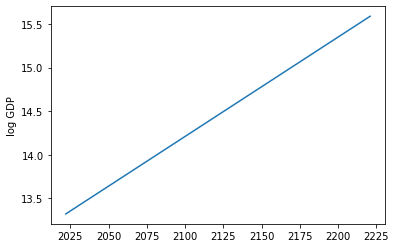

In [477]:
gdp_ = np.array([gdp(initial_gdp=initial_gdp,
                     gdp_growth=gdp_growth_p[GRAPH_P],
                     year=(y - CURRENT_YEAR)) for y in years])
plt.plot(years, np.log10(gdp_))
plt.ylabel('log GDP')

In [478]:
for y in years:
    print('Year: {} - GDP log$ {} (~{})'.format(y,
                                                np.round(np.log10(gdp_[y - CURRENT_YEAR]), 1),
                                                numerize(np.log10(gdp_[y - CURRENT_YEAR]))))
    

Year: 2022 - GDP log$ 13.3 (~10 trillion)
Year: 2023 - GDP log$ 13.3 (~10 trillion)
Year: 2024 - GDP log$ 13.3 (~10 trillion)
Year: 2025 - GDP log$ 13.4 (~10 trillion)
Year: 2026 - GDP log$ 13.4 (~10 trillion)
Year: 2027 - GDP log$ 13.4 (~10 trillion)
Year: 2028 - GDP log$ 13.4 (~10 trillion)
Year: 2029 - GDP log$ 13.4 (~10 trillion)
Year: 2030 - GDP log$ 13.4 (~10 trillion)
Year: 2031 - GDP log$ 13.4 (~10 trillion)
Year: 2032 - GDP log$ 13.4 (~10 trillion)
Year: 2033 - GDP log$ 13.4 (~10 trillion)
Year: 2034 - GDP log$ 13.5 (~10 trillion)
Year: 2035 - GDP log$ 13.5 (~10 trillion)
Year: 2036 - GDP log$ 13.5 (~10 trillion)
Year: 2037 - GDP log$ 13.5 (~10 trillion)
Year: 2038 - GDP log$ 13.5 (~10 trillion)
Year: 2039 - GDP log$ 13.5 (~10 trillion)
Year: 2040 - GDP log$ 13.5 (~10 trillion)
Year: 2041 - GDP log$ 13.5 (~10 trillion)
Year: 2042 - GDP log$ 13.5 (~10 trillion)
Year: 2043 - GDP log$ 13.6 (~10 trillion)
Year: 2044 - GDP log$ 13.6 (~10 trillion)
Year: 2045 - GDP log$ 13.6 (~10 tr

## Willingness to Pay Over Time

Text(0, 0.5, 'log $ willing to spend on TAI')

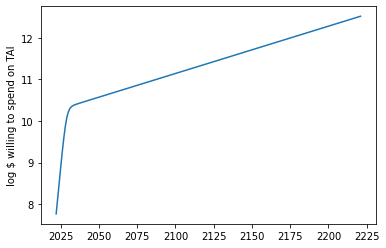

In [479]:
willingness = np.array([willingness_to_pay(initial_gdp=initial_gdp,
                                           gdp_growth=gdp_growth_p[GRAPH_P],
                                           initial_pay=10 ** initial_pay_p[GRAPH_P],
                                           spend_doubling_time=spend_doubling_time_p[GRAPH_P],
                                           max_gdp_frac=max_gdp_frac_p[GRAPH_P],
                                           year=(y - CURRENT_YEAR)) for y in years])

plt.plot(years, np.log10(willingness))
plt.ylabel('log $ willing to spend on TAI')


In [480]:
for y in years:
    print('Year: {} - willingness log$ {} (~{})'.format(y,
                                                        np.round(np.log10(willingness[y - CURRENT_YEAR]), 1),
                                                        numerize(np.log10(willingness[y - CURRENT_YEAR]))))

Year: 2022 - willingness log$ 7.8 (~10 million)
Year: 2023 - willingness log$ 8.1 (~100 million)
Year: 2024 - willingness log$ 8.5 (~100 million)
Year: 2025 - willingness log$ 8.9 (~100 million)
Year: 2026 - willingness log$ 9.3 (~one billion)
Year: 2027 - willingness log$ 9.6 (~one billion)
Year: 2028 - willingness log$ 9.9 (~one billion)
Year: 2029 - willingness log$ 10.1 (~10 billion)
Year: 2030 - willingness log$ 10.2 (~10 billion)
Year: 2031 - willingness log$ 10.3 (~10 billion)
Year: 2032 - willingness log$ 10.3 (~10 billion)
Year: 2033 - willingness log$ 10.4 (~10 billion)
Year: 2034 - willingness log$ 10.4 (~10 billion)
Year: 2035 - willingness log$ 10.4 (~10 billion)
Year: 2036 - willingness log$ 10.4 (~10 billion)
Year: 2037 - willingness log$ 10.4 (~10 billion)
Year: 2038 - willingness log$ 10.4 (~10 billion)
Year: 2039 - willingness log$ 10.4 (~10 billion)
Year: 2040 - willingness log$ 10.5 (~10 billion)
Year: 2041 - willingness log$ 10.5 (~10 billion)
Year: 2042 - willingn

## FLOPs Needed to Make TAI (Given Algorithmic Progress)

Text(0, 0.5, 'log FLOPs needed to make TAI')

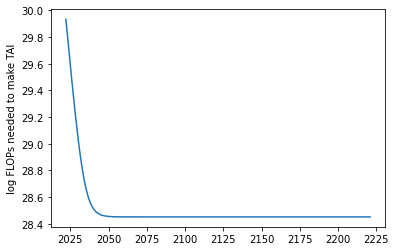

In [481]:
flops_ = np.array([flops_needed(initial_flops=10 ** initial_flops_p[GRAPH_P],
                                doubling_rate=algo_doubling_rate_p[GRAPH_P],
                                possible_reduction=10 ** possible_algo_reduction_fn(min_reduction_p[GRAPH_P], max_reduction_p[GRAPH_P], initial_flops_p[GRAPH_P]),
                                year=(y - CURRENT_YEAR)) for y in years])

plt.plot(years, np.log10(flops_))
plt.ylabel('log FLOPs needed to make TAI')


In [482]:
for y in years:
    print('Year: {} - log FLOPs needed for TAI {} (~{})'.format(y,
                                                                np.round(np.log10(flops_[y - CURRENT_YEAR]), 1),
                                                                numerize(np.log10(flops_[y - CURRENT_YEAR]))))

Year: 2022 - log FLOPs needed for TAI 29.9 (~100 octillion)
Year: 2023 - log FLOPs needed for TAI 29.8 (~100 octillion)
Year: 2024 - log FLOPs needed for TAI 29.7 (~100 octillion)
Year: 2025 - log FLOPs needed for TAI 29.6 (~100 octillion)
Year: 2026 - log FLOPs needed for TAI 29.5 (~100 octillion)
Year: 2027 - log FLOPs needed for TAI 29.4 (~100 octillion)
Year: 2028 - log FLOPs needed for TAI 29.2 (~100 octillion)
Year: 2029 - log FLOPs needed for TAI 29.1 (~100 octillion)
Year: 2030 - log FLOPs needed for TAI 29.0 (~100 octillion)
Year: 2031 - log FLOPs needed for TAI 29.0 (~10 octillion)
Year: 2032 - log FLOPs needed for TAI 28.9 (~10 octillion)
Year: 2033 - log FLOPs needed for TAI 28.8 (~10 octillion)
Year: 2034 - log FLOPs needed for TAI 28.7 (~10 octillion)
Year: 2035 - log FLOPs needed for TAI 28.7 (~10 octillion)
Year: 2036 - log FLOPs needed for TAI 28.6 (~10 octillion)
Year: 2037 - log FLOPs needed for TAI 28.6 (~10 octillion)
Year: 2038 - log FLOPs needed for TAI 28.6 (~10

## FLOPs per Dollar (Given Declining Costs)

Text(0, 0.5, 'log FLOPs per $1')

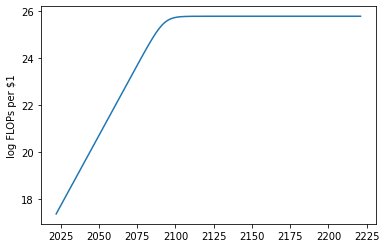

In [483]:
flops_per_dollar_ = np.array([flops_per_dollar(initial_flops_per_dollar=10 ** initial_flops_per_dollar_p[GRAPH_P],
                                               max_flops_per_dollar=10 ** max_flops_per_dollar_p[GRAPH_P],
                                               halving_rate=flops_halving_rate_p[GRAPH_P],
                                               year=(y - CURRENT_YEAR)) for y in years])
plt.plot(years, np.log10(flops_per_dollar_))
plt.ylabel('log FLOPs per $1')


In [484]:
for y in years:
    print('Year: {} - log {} FLOPs per $ (~{})'.format(y,
                                                       np.round(np.log10(flops_per_dollar_[y - CURRENT_YEAR]), 1),
                                                       numerize(np.log10(flops_per_dollar_[y - CURRENT_YEAR]))))

Year: 2022 - log 17.4 FLOPs per $ (~100 quadrillion)
Year: 2023 - log 17.5 FLOPs per $ (~100 quadrillion)
Year: 2024 - log 17.6 FLOPs per $ (~100 quadrillion)
Year: 2025 - log 17.7 FLOPs per $ (~100 quadrillion)
Year: 2026 - log 17.9 FLOPs per $ (~100 quadrillion)
Year: 2027 - log 18.0 FLOPs per $ (~100 quadrillion)
Year: 2028 - log 18.1 FLOPs per $ (~one quintillion)
Year: 2029 - log 18.2 FLOPs per $ (~one quintillion)
Year: 2030 - log 18.3 FLOPs per $ (~one quintillion)
Year: 2031 - log 18.5 FLOPs per $ (~one quintillion)
Year: 2032 - log 18.6 FLOPs per $ (~one quintillion)
Year: 2033 - log 18.7 FLOPs per $ (~one quintillion)
Year: 2034 - log 18.8 FLOPs per $ (~one quintillion)
Year: 2035 - log 18.9 FLOPs per $ (~one quintillion)
Year: 2036 - log 19.0 FLOPs per $ (~10 quintillion)
Year: 2037 - log 19.2 FLOPs per $ (~10 quintillion)
Year: 2038 - log 19.3 FLOPs per $ (~10 quintillion)
Year: 2039 - log 19.4 FLOPs per $ (~10 quintillion)
Year: 2040 - log 19.5 FLOPs per $ (~10 quintillion

## Max Possible OOM Reduction in TAI FLOP Size

Text(0.5, 0, 'initial FLOP needed for TAI prior to any reduction')

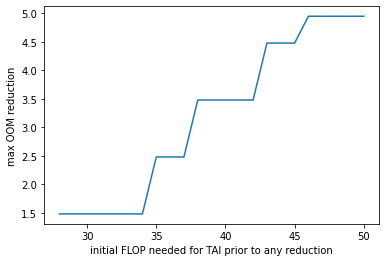

In [485]:
tai_sizes = range(28, 51)
flops_per_dollar_ = np.array([possible_algo_reduction_fn(min_reduction_p[GRAPH_P], max_reduction_p[GRAPH_P], t) for t in tai_sizes])
plt.plot(tai_sizes, flops_per_dollar_)
plt.ylabel('max OOM reduction')
plt.xlabel('initial FLOP needed for TAI prior to any reduction')

In [486]:
for t in tai_sizes:
    print('TAI log FLOP {} -> {} OOM reductions possible'.format(t,
                                                                 round(possible_algo_reduction_fn(min_reduction_p[GRAPH_P],
                                                                                                  max_reduction_p[GRAPH_P],
                                                                                                  t), 2)))
          

TAI log FLOP 28 -> 1.48 OOM reductions possible
TAI log FLOP 29 -> 1.48 OOM reductions possible
TAI log FLOP 30 -> 1.48 OOM reductions possible
TAI log FLOP 31 -> 1.48 OOM reductions possible
TAI log FLOP 32 -> 1.48 OOM reductions possible
TAI log FLOP 33 -> 1.48 OOM reductions possible
TAI log FLOP 34 -> 1.48 OOM reductions possible
TAI log FLOP 35 -> 2.48 OOM reductions possible
TAI log FLOP 36 -> 2.48 OOM reductions possible
TAI log FLOP 37 -> 2.48 OOM reductions possible
TAI log FLOP 38 -> 3.48 OOM reductions possible
TAI log FLOP 39 -> 3.48 OOM reductions possible
TAI log FLOP 40 -> 3.48 OOM reductions possible
TAI log FLOP 41 -> 3.48 OOM reductions possible
TAI log FLOP 42 -> 3.48 OOM reductions possible
TAI log FLOP 43 -> 4.48 OOM reductions possible
TAI log FLOP 44 -> 4.48 OOM reductions possible
TAI log FLOP 45 -> 4.48 OOM reductions possible
TAI log FLOP 46 -> 4.95 OOM reductions possible
TAI log FLOP 47 -> 4.95 OOM reductions possible
TAI log FLOP 48 -> 4.95 OOM reductions p

## Dollars Needed to Buy TAI (Given Algorithmic Progress and Decline in Cost per FLOP)

Text(0, 0.5, 'log $ needed to buy TAI')

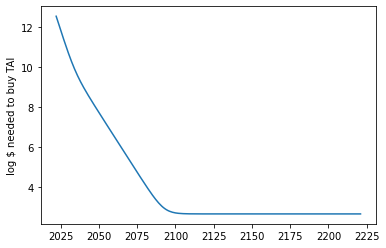

In [487]:
cost_of_tai_ = np.array([cost_of_tai(initial_flops=10 ** initial_flops_p[GRAPH_P],
                                     possible_reduction=10 ** possible_algo_reduction_fn(min_reduction_p[GRAPH_P], max_reduction_p[GRAPH_P], initial_flops_p[GRAPH_P]),
                                     algo_doubling_rate=algo_doubling_rate_p[GRAPH_P],
                                     initial_flops_per_dollar=10 ** initial_flops_per_dollar_p[GRAPH_P],
                                     max_flops_per_dollar=10 ** max_flops_per_dollar_p[GRAPH_P],
                                     flops_halving_rate=flops_halving_rate_p[GRAPH_P],
                                     year=(y - CURRENT_YEAR)) for y in years])

plt.plot(years, np.log10(cost_of_tai_))
plt.ylabel('log $ needed to buy TAI')


In [488]:
for y in years:
    print('Year: {} - log $ {} to buy TAI (~{})'.format(y,
                                                        np.round(np.log10(cost_of_tai_[y - CURRENT_YEAR]), 1),
                                                        numerize(np.log10(cost_of_tai_[y - CURRENT_YEAR]))))

Year: 2022 - log $ 12.6 to buy TAI (~one trillion)
Year: 2023 - log $ 12.3 to buy TAI (~one trillion)
Year: 2024 - log $ 12.1 to buy TAI (~one trillion)
Year: 2025 - log $ 11.9 to buy TAI (~100 billion)
Year: 2026 - log $ 11.6 to buy TAI (~100 billion)
Year: 2027 - log $ 11.4 to buy TAI (~100 billion)
Year: 2028 - log $ 11.2 to buy TAI (~100 billion)
Year: 2029 - log $ 10.9 to buy TAI (~10 billion)
Year: 2030 - log $ 10.7 to buy TAI (~10 billion)
Year: 2031 - log $ 10.5 to buy TAI (~10 billion)
Year: 2032 - log $ 10.3 to buy TAI (~10 billion)
Year: 2033 - log $ 10.1 to buy TAI (~10 billion)
Year: 2034 - log $ 9.9 to buy TAI (~one billion)
Year: 2035 - log $ 9.7 to buy TAI (~one billion)
Year: 2036 - log $ 9.6 to buy TAI (~one billion)
Year: 2037 - log $ 9.4 to buy TAI (~one billion)
Year: 2038 - log $ 9.3 to buy TAI (~one billion)
Year: 2039 - log $ 9.1 to buy TAI (~one billion)
Year: 2040 - log $ 9.0 to buy TAI (~100 million)
Year: 2041 - log $ 8.9 to buy TAI (~100 million)
Year: 2042

## FLOPs at Max Spend

Text(0, 0.5, 'max log FLOPs bought given willingness to spend')

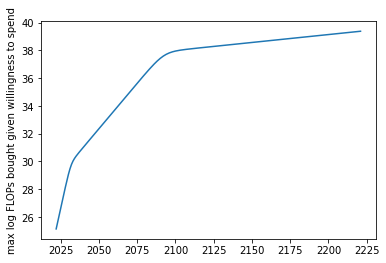

In [489]:
flops_at_max_ = np.array([flops_at_max(initial_gdp=initial_gdp,
                                       gdp_growth=gdp_growth_p[GRAPH_P],
                                       initial_pay=10 ** initial_pay_p[GRAPH_P],
                                       spend_doubling_time=spend_doubling_time_p[GRAPH_P],
                                       max_gdp_frac=max_gdp_frac_p[GRAPH_P],
                                       initial_flops_per_dollar=10 ** initial_flops_per_dollar_p[GRAPH_P],
                                       max_flops_per_dollar=10 ** max_flops_per_dollar_p[GRAPH_P],
                                       flops_halving_rate=flops_halving_rate_p[GRAPH_P],
                                       year=(y - CURRENT_YEAR)) for y in years])

plt.plot(years, np.log10(flops_at_max_))
plt.ylabel('max log FLOPs bought given willingness to spend')


In [490]:
for y in years:
    print('Year: {} - max log FLOPs {} (~{})'.format(y,
                                                     np.round(np.log10(flops_at_max_[y - CURRENT_YEAR]), 1),
                                                     numerize(np.log10(flops_at_max_[y - CURRENT_YEAR]))))

Year: 2022 - max log FLOPs 25.1 (~10 septillion)
Year: 2023 - max log FLOPs 25.6 (~10 septillion)
Year: 2024 - max log FLOPs 26.1 (~100 septillion)
Year: 2025 - max log FLOPs 26.6 (~100 septillion)
Year: 2026 - max log FLOPs 27.1 (~one octillion)
Year: 2027 - max log FLOPs 27.6 (~one octillion)
Year: 2028 - max log FLOPs 28.1 (~10 octillion)
Year: 2029 - max log FLOPs 28.6 (~10 octillion)
Year: 2030 - max log FLOPs 29.1 (~100 octillion)
Year: 2031 - max log FLOPs 29.5 (~100 octillion)
Year: 2032 - max log FLOPs 29.8 (~100 octillion)
Year: 2033 - max log FLOPs 30.0 (~one nonillion)
Year: 2034 - max log FLOPs 30.2 (~one nonillion)
Year: 2035 - max log FLOPs 30.4 (~one nonillion)
Year: 2036 - max log FLOPs 30.5 (~one nonillion)
Year: 2037 - max log FLOPs 30.7 (~one nonillion)
Year: 2038 - max log FLOPs 30.8 (~one nonillion)
Year: 2039 - max log FLOPs 30.9 (~one nonillion)
Year: 2040 - max log FLOPs 31.1 (~10 nonillion)
Year: 2041 - max log FLOPs 31.2 (~10 nonillion)
Year: 2042 - max log F

## Chance of Non-scaling Delay

Text(0, 0.5, 'chance of non-scaling delay by year')

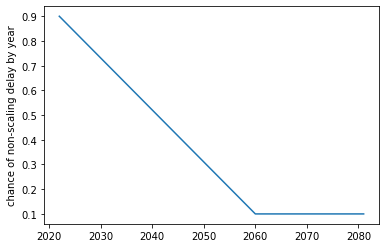

In [528]:
p_nonscaling_delay_ = np.array([p_nonscaling_delay(initial_chance_of_nonscaling_issue,
                                                   final_chance_of_nonscaling_issue,
                                                   year=y,
                                                   max_year=nonscaling_issue_bottom_year) for y in years])

plt.plot(years[:60], p_nonscaling_delay_[:60])
plt.ylabel('chance of non-scaling delay by year')
# TODO: Make logistic?

In [492]:
for y in years:
    print('Year: {} - p(nonscaling delay) = {}%'.format(y,
                                                        np.round(p_nonscaling_delay_[y - CURRENT_YEAR] * 100, 1)))

Year: 2022 - p(nonscaling delay) = 90.0%
Year: 2023 - p(nonscaling delay) = 87.9%
Year: 2024 - p(nonscaling delay) = 85.8%
Year: 2025 - p(nonscaling delay) = 83.7%
Year: 2026 - p(nonscaling delay) = 81.6%
Year: 2027 - p(nonscaling delay) = 79.5%
Year: 2028 - p(nonscaling delay) = 77.4%
Year: 2029 - p(nonscaling delay) = 75.3%
Year: 2030 - p(nonscaling delay) = 73.2%
Year: 2031 - p(nonscaling delay) = 71.1%
Year: 2032 - p(nonscaling delay) = 68.9%
Year: 2033 - p(nonscaling delay) = 66.8%
Year: 2034 - p(nonscaling delay) = 64.7%
Year: 2035 - p(nonscaling delay) = 62.6%
Year: 2036 - p(nonscaling delay) = 60.5%
Year: 2037 - p(nonscaling delay) = 58.4%
Year: 2038 - p(nonscaling delay) = 56.3%
Year: 2039 - p(nonscaling delay) = 54.2%
Year: 2040 - p(nonscaling delay) = 52.1%
Year: 2041 - p(nonscaling delay) = 50.0%
Year: 2042 - p(nonscaling delay) = 47.9%
Year: 2043 - p(nonscaling delay) = 45.8%
Year: 2044 - p(nonscaling delay) = 43.7%
Year: 2045 - p(nonscaling delay) = 41.6%
Year: 2046 - p(n

## Chance of Rapid Recursive Self-Improvement

Text(0.5, 0, 'percentage of TAI-level FLOP')

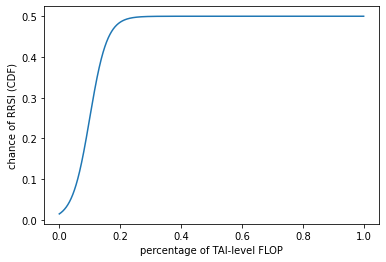

In [493]:
p_rrsi_ = np.array([p_rapid_recursive_self_improvement(10000,
                                                       x,
                                                       base_p_recursive,
                                                       recursive_curve_steepness,
                                                       recursive_curve_inflection) for x in range(10000)])

plt.plot([r / 10000 for r in range(10000)], p_rrsi_)
plt.ylabel('chance of RRSI (CDF)')
plt.xlabel('percentage of TAI-level FLOP')

In [494]:
samples = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200,
           1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
for i in samples:
    print('Ratio: {} in 10000 - p(RRSI) (CDF) = {}%'.format(i, np.round(p_rrsi_[i-1] * 100, 1)))

Ratio: 1 in 10000 - p(RRSI) (CDF) = 1.5%
Ratio: 5 in 10000 - p(RRSI) (CDF) = 1.5%
Ratio: 10 in 10000 - p(RRSI) (CDF) = 1.5%
Ratio: 20 in 10000 - p(RRSI) (CDF) = 1.6%
Ratio: 30 in 10000 - p(RRSI) (CDF) = 1.6%
Ratio: 40 in 10000 - p(RRSI) (CDF) = 1.7%
Ratio: 50 in 10000 - p(RRSI) (CDF) = 1.7%
Ratio: 60 in 10000 - p(RRSI) (CDF) = 1.8%
Ratio: 70 in 10000 - p(RRSI) (CDF) = 1.9%
Ratio: 80 in 10000 - p(RRSI) (CDF) = 1.9%
Ratio: 90 in 10000 - p(RRSI) (CDF) = 2.0%
Ratio: 100 in 10000 - p(RRSI) (CDF) = 2.0%
Ratio: 200 in 10000 - p(RRSI) (CDF) = 2.9%
Ratio: 300 in 10000 - p(RRSI) (CDF) = 4.0%
Ratio: 400 in 10000 - p(RRSI) (CDF) = 5.4%
Ratio: 500 in 10000 - p(RRSI) (CDF) = 7.4%
Ratio: 600 in 10000 - p(RRSI) (CDF) = 9.9%
Ratio: 700 in 10000 - p(RRSI) (CDF) = 12.9%
Ratio: 800 in 10000 - p(RRSI) (CDF) = 16.6%
Ratio: 900 in 10000 - p(RRSI) (CDF) = 20.6%
Ratio: 1000 in 10000 - p(RRSI) (CDF) = 25.0%
Ratio: 1100 in 10000 - p(RRSI) (CDF) = 29.3%
Ratio: 1200 in 10000 - p(RRSI) (CDF) = 33.4%
Ratio: 1300 in 

## Run Model

Running
## RUN 1/10000 ##
Diagnostic: tai_flop_size=34.611340089644024, nonscaling_delay=0.9006068002613046, algo_doubling_rate=4.004381285138448, possible_algo_reduction=3.100972397590105, initial_flops_per_dollar=1.9102356683949738e+17, flops_halving_rate=3.620666784897105, max_flops_per_dollar=1.175596537469802e+23, initial_pay=20873749.53008946, gdp_growth=1.0268101119907058, max_gdp_frac=0.0005274736595217186, willingness_ramp=1, spend_doubling_time=2.5018006380155104
-
It takes 34.6 log FLOPs (~10 decillion) for transformative capabilities.
Every 4.0 years algorithms get 2x better, with 3.1 log reductions possible.
FLOPs start at a cost of 17.3 log FLOPs (~100 quadrillion) per $. Every 3.6 years they get 2x cheaper, to a maximum of 23.1 log FLOPs (~100 sextillion) per $.
We are willing to pay 7.3 log $ (~10 million) and this increases by 2.5x per year to a max of 0.0005% of GDP. GDP grows at a rate of 1.027x per year.
In this simulation, there are no willingness ramp effects.
If 

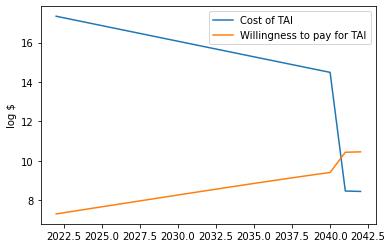

## RUN 2/10000 ##
Diagnostic: tai_flop_size=26.703527283080028, nonscaling_delay=3.347325720498012, algo_doubling_rate=4.613468648756299, possible_algo_reduction=1.3040166185568771, initial_flops_per_dollar=1.305556061469733e+17, flops_halving_rate=2.605416420840506, max_flops_per_dollar=2.639050771582838e+24, initial_pay=46430938.51722703, gdp_growth=1.0220989992570395, max_gdp_frac=0.00016711970891098292, willingness_ramp=1, spend_doubling_time=0.8325996576510097
-
It takes 26.7 log FLOPs (~100 septillion) for transformative capabilities.
Every 4.6 years algorithms get 2x better, with 1.3 log reductions possible.
FLOPs start at a cost of 17.1 log FLOPs (~100 quadrillion) per $. Every 2.6 years they get 2x cheaper, to a maximum of 24.4 log FLOPs (~one septillion) per $.
We are willing to pay 7.7 log $ (~10 million) and this increases by 0.8x per year to a max of 0.0002% of GDP. GDP grows at a rate of 1.022x per year.
In this simulation, there are no willingness ramp effects.
If a non-

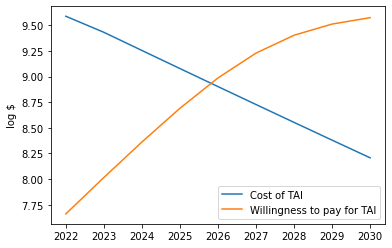

## RUN 3/10000 ##
Diagnostic: tai_flop_size=26.434995631810803, nonscaling_delay=1.4993319569825503, algo_doubling_rate=3.1336792960488014, possible_algo_reduction=0.8662837117188256, initial_flops_per_dollar=1.1727686155944168e+17, flops_halving_rate=3.1581072642118952, max_flops_per_dollar=2.4528098932267614e+25, initial_pay=35272750.109567165, gdp_growth=1.01680259134753, max_gdp_frac=0.00016630021068295757, willingness_ramp=1, spend_doubling_time=0.7324465956750932
-
It takes 26.4 log FLOPs (~100 septillion) for transformative capabilities.
Every 3.1 years algorithms get 2x better, with 0.9 log reductions possible.
FLOPs start at a cost of 17.1 log FLOPs (~100 quadrillion) per $. Every 3.2 years they get 2x cheaper, to a maximum of 25.4 log FLOPs (~10 septillion) per $.
We are willing to pay 7.5 log $ (~10 million) and this increases by 0.7x per year to a max of 0.0002% of GDP. GDP grows at a rate of 1.017x per year.
In this simulation, there are no willingness ramp effects.
If a n

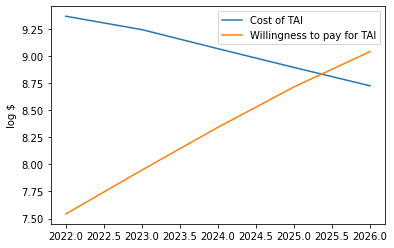

## RUN 4/10000 ##
Diagnostic: tai_flop_size=40.604301444542116, nonscaling_delay=2.3710669826794515, algo_doubling_rate=3.6720268029183267, possible_algo_reduction=4.149951397640134, initial_flops_per_dollar=1.966193059642307e+17, flops_halving_rate=2.484378206903915, max_flops_per_dollar=3.154846919776909e+25, initial_pay=32160729.76062885, gdp_growth=1.0292449870269351, max_gdp_frac=0.00015688973446942723, willingness_ramp=1, spend_doubling_time=1.2294809568414904
-
It takes 40.6 log FLOPs (~10 million decillion) for transformative capabilities.
Every 3.7 years algorithms get 2x better, with 4.1 log reductions possible.
FLOPs start at a cost of 17.3 log FLOPs (~100 quadrillion) per $. Every 2.5 years they get 2x cheaper, to a maximum of 25.5 log FLOPs (~10 septillion) per $.
We are willing to pay 7.5 log $ (~10 million) and this increases by 1.2x per year to a max of 0.0002% of GDP. GDP grows at a rate of 1.029x per year.
In this simulation, there are no willingness ramp effects.
If 

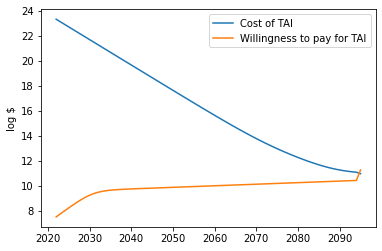

## RUN 5/10000 ##
Diagnostic: tai_flop_size=41.84649389434538, nonscaling_delay=2.7902763063561857, algo_doubling_rate=2.37478244947114, possible_algo_reduction=4.061129596977961, initial_flops_per_dollar=2.508122588325163e+17, flops_halving_rate=1.8389544326515856, max_flops_per_dollar=1.954878125368805e+24, initial_pay=26106377.842730626, gdp_growth=1.0124289769694794, max_gdp_frac=0.0007364117080297685, willingness_ramp=1, spend_doubling_time=0.973345014616994
-
It takes 41.8 log FLOPs (~100 million decillion) for transformative capabilities.
Every 2.4 years algorithms get 2x better, with 4.1 log reductions possible.
FLOPs start at a cost of 17.4 log FLOPs (~100 quadrillion) per $. Every 1.8 years they get 2x cheaper, to a maximum of 24.3 log FLOPs (~one septillion) per $.
We are willing to pay 7.4 log $ (~10 million) and this increases by 1.0x per year to a max of 0.0007% of GDP. GDP grows at a rate of 1.012x per year.
In this simulation, there are no willingness ramp effects.
If a

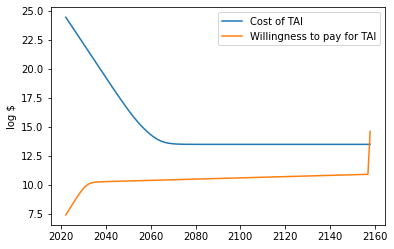

## RUN 6/10000 ##
Diagnostic: tai_flop_size=38.58950883445914, nonscaling_delay=5.96883204331279, algo_doubling_rate=3.838461883959759, possible_algo_reduction=2.867531418688923, initial_flops_per_dollar=2.1380772116443424e+17, flops_halving_rate=2.9744733063202142, max_flops_per_dollar=4.1778306859086324e+22, initial_pay=13257536.537418177, gdp_growth=1.0246510107246392, max_gdp_frac=0.00013686120480553096, willingness_ramp=1, spend_doubling_time=1.4844261404228336
-
It takes 38.6 log FLOPs (~100 thousand decillion) for transformative capabilities.
Every 3.8 years algorithms get 2x better, with 2.9 log reductions possible.
FLOPs start at a cost of 17.3 log FLOPs (~100 quadrillion) per $. Every 3.0 years they get 2x cheaper, to a maximum of 22.6 log FLOPs (~10 sextillion) per $.
We are willing to pay 7.1 log $ (~10 million) and this increases by 1.5x per year to a max of 0.0001% of GDP. GDP grows at a rate of 1.025x per year.
In this simulation, there are no willingness ramp effects.
I

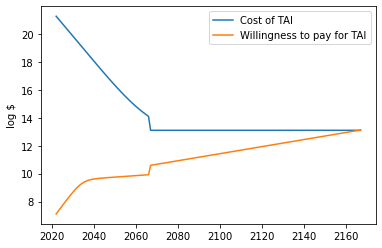

## RUN 7/10000 ##
Diagnostic: tai_flop_size=38.197171674323855, nonscaling_delay=3.3008219288035137, algo_doubling_rate=3.588186713030496, possible_algo_reduction=3.8675766699119816, initial_flops_per_dollar=1.1861603083126213e+17, flops_halving_rate=2.772545869745797, max_flops_per_dollar=2.3375071985072448e+25, initial_pay=27626263.092554282, gdp_growth=1.0266031103024018, max_gdp_frac=0.00010668806441424765, willingness_ramp=0.7573300671781182, spend_doubling_time=1.6914058403547498
-
It takes 38.2 log FLOPs (~100 thousand decillion) for transformative capabilities.
Every 3.6 years algorithms get 2x better, with 3.9 log reductions possible.
FLOPs start at a cost of 17.1 log FLOPs (~100 quadrillion) per $. Every 2.8 years they get 2x cheaper, to a maximum of 25.4 log FLOPs (~10 septillion) per $.
We are willing to pay 7.4 log $ (~10 million) and this increases by 1.7x per year to a max of 0.0001% of GDP. GDP grows at a rate of 1.027x per year.
In this simulation, if we are 76.0% of t

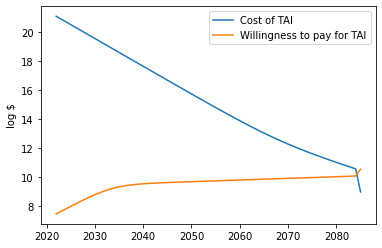

## RUN 8/10000 ##
Diagnostic: tai_flop_size=34.93490263134608, nonscaling_delay=1.324351402112397, algo_doubling_rate=3.0221579026193335, possible_algo_reduction=2.975564966661385, initial_flops_per_dollar=1.2278872631581011e+17, flops_halving_rate=2.9561544250432794, max_flops_per_dollar=1.5945382572348836e+24, initial_pay=12730892.861779865, gdp_growth=1.0237725073729893, max_gdp_frac=0.0003292399154565914, willingness_ramp=1, spend_doubling_time=0.9475569540651045
-
It takes 34.9 log FLOPs (~10 decillion) for transformative capabilities.
Every 3.0 years algorithms get 2x better, with 3.0 log reductions possible.
FLOPs start at a cost of 17.1 log FLOPs (~100 quadrillion) per $. Every 3.0 years they get 2x cheaper, to a maximum of 24.2 log FLOPs (~one septillion) per $.
We are willing to pay 7.1 log $ (~10 million) and this increases by 0.9x per year to a max of 0.0003% of GDP. GDP grows at a rate of 1.024x per year.
In this simulation, there are no willingness ramp effects.
If a non-

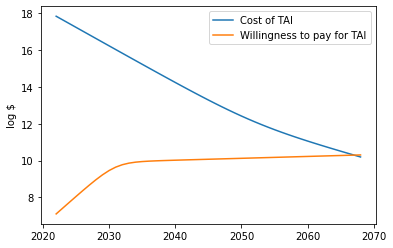

## RUN 9/10000 ##
Diagnostic: tai_flop_size=26.414875519563882, nonscaling_delay=19.635047540407303, algo_doubling_rate=3.271126416614657, possible_algo_reduction=0.808048557544488, initial_flops_per_dollar=2.313507785602804e+17, flops_halving_rate=2.9013958792781787, max_flops_per_dollar=1.7385379091352512e+24, initial_pay=41414847.244560905, gdp_growth=1.0238664705377287, max_gdp_frac=0.0003349514154355328, willingness_ramp=1, spend_doubling_time=2.5978074828598094
-
It takes 26.4 log FLOPs (~100 septillion) for transformative capabilities.
Every 3.3 years algorithms get 2x better, with 0.8 log reductions possible.
FLOPs start at a cost of 17.4 log FLOPs (~100 quadrillion) per $. Every 2.9 years they get 2x cheaper, to a maximum of 24.2 log FLOPs (~one septillion) per $.
We are willing to pay 7.6 log $ (~10 million) and this increases by 2.6x per year to a max of 0.0003% of GDP. GDP grows at a rate of 1.024x per year.
In this simulation, there are no willingness ramp effects.
If a no

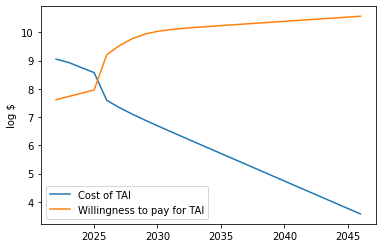

## RUN 10/10000 ##
Diagnostic: tai_flop_size=31.207633383745378, nonscaling_delay=1.7399193932627854, algo_doubling_rate=2.829099040302035, possible_algo_reduction=2.5153530904201618, initial_flops_per_dollar=1.9889187931498928e+17, flops_halving_rate=3.050586997021512, max_flops_per_dollar=2.5910048926578886e+26, initial_pay=20577332.361118622, gdp_growth=1.0158909477384128, max_gdp_frac=0.0003857780393294001, willingness_ramp=1, spend_doubling_time=0.6276060839456098
-
It takes 31.2 log FLOPs (~10 nonillion) for transformative capabilities.
Every 2.8 years algorithms get 2x better, with 2.5 log reductions possible.
FLOPs start at a cost of 17.3 log FLOPs (~100 quadrillion) per $. Every 3.1 years they get 2x cheaper, to a maximum of 26.4 log FLOPs (~100 septillion) per $.
We are willing to pay 7.3 log $ (~10 million) and this increases by 0.6x per year to a max of 0.0004% of GDP. GDP grows at a rate of 1.016x per year.
In this simulation, there are no willingness ramp effects.
If a no

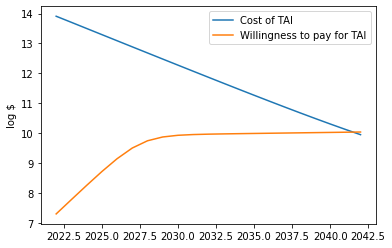

## RUN 11/10000 ##
Diagnostic: tai_flop_size=39.45543472755058, nonscaling_delay=3.285450764108159, algo_doubling_rate=3.0175264185679205, possible_algo_reduction=4.63448744516068, initial_flops_per_dollar=1.2562595576950654e+17, flops_halving_rate=3.5767978206899924, max_flops_per_dollar=5.030631525577886e+24, initial_pay=70552150.82783322, gdp_growth=1.028125454537081, max_gdp_frac=0.0007659802068759087, willingness_ramp=1, spend_doubling_time=1.2437450897142481
-
It takes 39.5 log FLOPs (~one million decillion) for transformative capabilities.
Every 3.0 years algorithms get 2x better, with 4.6 log reductions possible.
FLOPs start at a cost of 17.1 log FLOPs (~100 quadrillion) per $. Every 3.6 years they get 2x cheaper, to a maximum of 24.7 log FLOPs (~one septillion) per $.
We are willing to pay 7.8 log $ (~10 million) and this increases by 1.2x per year to a max of 0.0008% of GDP. GDP grows at a rate of 1.028x per year.
In this simulation, there are no willingness ramp effects.
If 

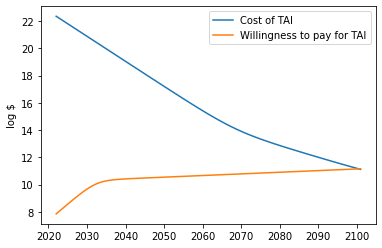

## RUN 12/10000 ##
Diagnostic: tai_flop_size=32.622949139997615, nonscaling_delay=2.4950396513221014, algo_doubling_rate=2.061682070365327, possible_algo_reduction=2.3074131715046704, initial_flops_per_dollar=1.3723212681756805e+17, flops_halving_rate=3.4162219290762774, max_flops_per_dollar=5.1918859804795275e+22, initial_pay=42498687.6326045, gdp_growth=1.0213816324759217, max_gdp_frac=0.0006329151021389382, willingness_ramp=1, spend_doubling_time=0.7795901333635024
-
It takes 32.6 log FLOPs (~100 nonillion) for transformative capabilities.
Every 2.1 years algorithms get 2x better, with 2.3 log reductions possible.
FLOPs start at a cost of 17.1 log FLOPs (~100 quadrillion) per $. Every 3.4 years they get 2x cheaper, to a maximum of 22.7 log FLOPs (~10 sextillion) per $.
We are willing to pay 7.6 log $ (~10 million) and this increases by 0.8x per year to a max of 0.0006% of GDP. GDP grows at a rate of 1.021x per year.
In this simulation, there are no willingness ramp effects.
If a non

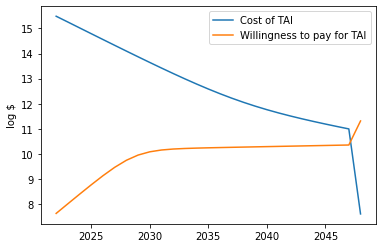

## RUN 13/10000 ##
Diagnostic: tai_flop_size=29.33305956710403, nonscaling_delay=10.566611641328414, algo_doubling_rate=4.530208257202995, possible_algo_reduction=2.6044366358766466, initial_flops_per_dollar=1.9152259436190214e+17, flops_halving_rate=3.223763433101622, max_flops_per_dollar=2.9791854945442363e+22, initial_pay=41908979.589887895, gdp_growth=1.0262008712439394, max_gdp_frac=0.0002785034574815852, willingness_ramp=1, spend_doubling_time=0.8820825781006144
-
It takes 29.3 log FLOPs (~100 octillion) for transformative capabilities.
Every 4.5 years algorithms get 2x better, with 2.6 log reductions possible.
FLOPs start at a cost of 17.3 log FLOPs (~100 quadrillion) per $. Every 3.2 years they get 2x cheaper, to a maximum of 22.5 log FLOPs (~10 sextillion) per $.
We are willing to pay 7.6 log $ (~10 million) and this increases by 0.9x per year to a max of 0.0003% of GDP. GDP grows at a rate of 1.026x per year.
In this simulation, there are no willingness ramp effects.
If a non

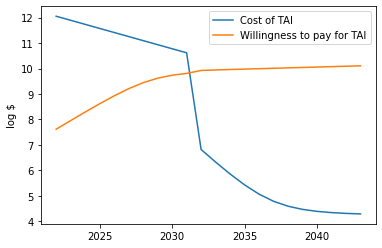

## RUN 14/10000 ##
Diagnostic: tai_flop_size=29.330064611570098, nonscaling_delay=13.317284409251059, algo_doubling_rate=4.942869001768688, possible_algo_reduction=1.3946928887838745, initial_flops_per_dollar=1.5386962250905264e+17, flops_halving_rate=3.480253571691531, max_flops_per_dollar=1.4723467108516946e+24, initial_pay=21172079.48806142, gdp_growth=1.0173896389614507, max_gdp_frac=0.0010421027009886968, willingness_ramp=1, spend_doubling_time=3.0523849105362797
-
It takes 29.3 log FLOPs (~100 octillion) for transformative capabilities.
Every 4.9 years algorithms get 2x better, with 1.4 log reductions possible.
FLOPs start at a cost of 17.2 log FLOPs (~100 quadrillion) per $. Every 3.5 years they get 2x cheaper, to a maximum of 24.2 log FLOPs (~one septillion) per $.
We are willing to pay 7.3 log $ (~10 million) and this increases by 3.1x per year to a max of 0.001% of GDP. GDP grows at a rate of 1.017x per year.
In this simulation, there are no willingness ramp effects.
If a non

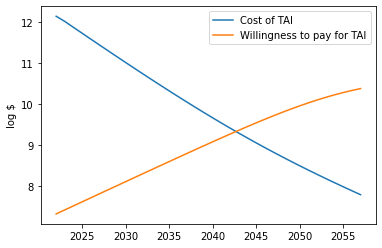

## RUN 15/10000 ##
Diagnostic: tai_flop_size=34.11131150733721, nonscaling_delay=8.259888647107664, algo_doubling_rate=2.968061920763635, possible_algo_reduction=2.8530377058024854, initial_flops_per_dollar=1.1958414592667675e+17, flops_halving_rate=2.553442820631768, max_flops_per_dollar=2.998940895937929e+27, initial_pay=22302709.805186246, gdp_growth=1.0168284348303895, max_gdp_frac=0.0007249352567255371, willingness_ramp=1, spend_doubling_time=1.126256437280698
-
It takes 34.1 log FLOPs (~10 decillion) for transformative capabilities.
Every 3.0 years algorithms get 2x better, with 2.9 log reductions possible.
FLOPs start at a cost of 17.1 log FLOPs (~100 quadrillion) per $. Every 2.6 years they get 2x cheaper, to a maximum of 27.5 log FLOPs (~one octillion) per $.
We are willing to pay 7.3 log $ (~10 million) and this increases by 1.1x per year to a max of 0.0007% of GDP. GDP grows at a rate of 1.017x per year.
In this simulation, there are no willingness ramp effects.
If a non-sca

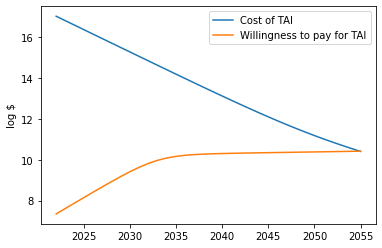

## RUN 16/10000 ##
Diagnostic: tai_flop_size=32.03348092482379, nonscaling_delay=2.280375047713095, algo_doubling_rate=4.426962494171391, possible_algo_reduction=2.218597632092892, initial_flops_per_dollar=9.530014133066603e+16, flops_halving_rate=2.672229175616298, max_flops_per_dollar=2.724361055505555e+26, initial_pay=32826852.68279041, gdp_growth=1.0302389446395828, max_gdp_frac=6.942096410841541e-05, willingness_ramp=1, spend_doubling_time=1.0239569309888654
-
It takes 32.0 log FLOPs (~100 nonillion) for transformative capabilities.
Every 4.4 years algorithms get 2x better, with 2.2 log reductions possible.
FLOPs start at a cost of 17.0 log FLOPs (~10 quadrillion) per $. Every 2.7 years they get 2x cheaper, to a maximum of 26.4 log FLOPs (~100 septillion) per $.
We are willing to pay 7.5 log $ (~10 million) and this increases by 1.0x per year to a max of 0.0001% of GDP. GDP grows at a rate of 1.03x per year.
In this simulation, there are no willingness ramp effects.
If a non-scali

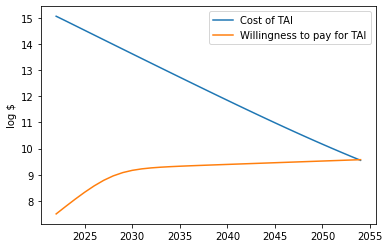

## RUN 17/10000 ##
Diagnostic: tai_flop_size=41.54753437922725, nonscaling_delay=15.369628459196699, algo_doubling_rate=3.8961630120037727, possible_algo_reduction=4.266864437595728, initial_flops_per_dollar=3.171485411773456e+17, flops_halving_rate=2.9382354928965935, max_flops_per_dollar=6.942754583447132e+20, initial_pay=26976102.863344364, gdp_growth=1.0190690500258601, max_gdp_frac=0.0003666527852389766, willingness_ramp=1, spend_doubling_time=1.0177421236130537
-
It takes 41.5 log FLOPs (~100 million decillion) for transformative capabilities.
Every 3.9 years algorithms get 2x better, with 4.3 log reductions possible.
FLOPs start at a cost of 17.5 log FLOPs (~100 quadrillion) per $. Every 2.9 years they get 2x cheaper, to a maximum of 20.8 log FLOPs (~100 quintillion) per $.
We are willing to pay 7.4 log $ (~10 million) and this increases by 1.0x per year to a max of 0.0004% of GDP. GDP grows at a rate of 1.019x per year.
In this simulation, there are no willingness ramp effects.

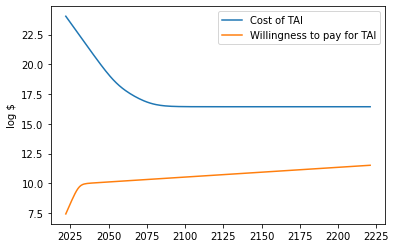

## RUN 18/10000 ##
Diagnostic: tai_flop_size=32.139414756217384, nonscaling_delay=14.61654016495023, algo_doubling_rate=2.9500025621900163, possible_algo_reduction=2.0808272300426065, initial_flops_per_dollar=2.3441246867593552e+17, flops_halving_rate=2.1739825627094604, max_flops_per_dollar=7.948698491112268e+21, initial_pay=15367903.260787768, gdp_growth=1.027066679743855, max_gdp_frac=0.0007995752206018579, willingness_ramp=1, spend_doubling_time=1.4780751498580964
-
It takes 32.1 log FLOPs (~100 nonillion) for transformative capabilities.
Every 3.0 years algorithms get 2x better, with 2.1 log reductions possible.
FLOPs start at a cost of 17.4 log FLOPs (~100 quadrillion) per $. Every 2.2 years they get 2x cheaper, to a maximum of 21.9 log FLOPs (~one sextillion) per $.
We are willing to pay 7.2 log $ (~10 million) and this increases by 1.5x per year to a max of 0.0008% of GDP. GDP grows at a rate of 1.027x per year.
In this simulation, there are no willingness ramp effects.
If a no

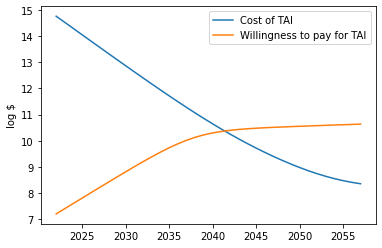

## RUN 19/10000 ##
Diagnostic: tai_flop_size=36.74280628979225, nonscaling_delay=10.846386258420567, algo_doubling_rate=4.037419172497248, possible_algo_reduction=3.7368206634691274, initial_flops_per_dollar=1.4012393528379646e+17, flops_halving_rate=2.3598797031113867, max_flops_per_dollar=1.1005351520023118e+25, initial_pay=22629373.2486048, gdp_growth=1.0207445697148072, max_gdp_frac=0.0007366562367935389, willingness_ramp=1, spend_doubling_time=0.6726134471740643
-
It takes 36.7 log FLOPs (~one thousand decillion) for transformative capabilities.
Every 4.0 years algorithms get 2x better, with 3.7 log reductions possible.
FLOPs start at a cost of 17.1 log FLOPs (~100 quadrillion) per $. Every 2.4 years they get 2x cheaper, to a maximum of 25.0 log FLOPs (~10 septillion) per $.
We are willing to pay 7.4 log $ (~10 million) and this increases by 0.7x per year to a max of 0.0007% of GDP. GDP grows at a rate of 1.021x per year.
In this simulation, there are no willingness ramp effects.


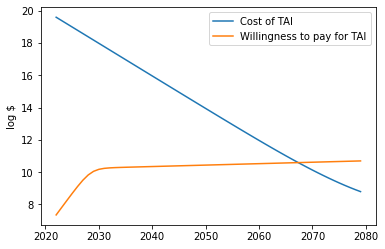

## RUN 20/10000 ##
Diagnostic: tai_flop_size=32.215077515922175, nonscaling_delay=2.316079916095699, algo_doubling_rate=2.9284801375466945, possible_algo_reduction=1.0516840335798867, initial_flops_per_dollar=1.7398075847924067e+17, flops_halving_rate=3.5175864349822583, max_flops_per_dollar=3.3820039863262454e+24, initial_pay=24782453.037988584, gdp_growth=1.0263032714683844, max_gdp_frac=6e-05, willingness_ramp=1, spend_doubling_time=0.9730021281001431
-
It takes 32.2 log FLOPs (~100 nonillion) for transformative capabilities.
Every 2.9 years algorithms get 2x better, with 1.1 log reductions possible.
FLOPs start at a cost of 17.2 log FLOPs (~100 quadrillion) per $. Every 3.5 years they get 2x cheaper, to a maximum of 24.5 log FLOPs (~one septillion) per $.
We are willing to pay 7.4 log $ (~10 million) and this increases by 1.0x per year to a max of 0.0001% of GDP. GDP grows at a rate of 1.026x per year.
In this simulation, there are no willingness ramp effects.
If a non-scaling dela

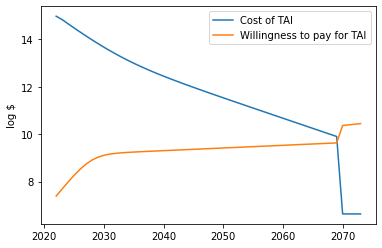

## RUN 21/10000 ##
Diagnostic: tai_flop_size=40.01817770366892, nonscaling_delay=1.201523329382978, algo_doubling_rate=2.123105585963736, possible_algo_reduction=3.244540927250415, initial_flops_per_dollar=2.2730863984812288e+17, flops_halving_rate=3.1990033907909123, max_flops_per_dollar=5.283794702769776e+22, initial_pay=29553976.25594019, gdp_growth=1.019943242639737, max_gdp_frac=0.00028039912740996623, willingness_ramp=1, spend_doubling_time=1.2677605384384059
-
It takes 40.0 log FLOPs (~10 million decillion) for transformative capabilities.
Every 2.1 years algorithms get 2x better, with 3.2 log reductions possible.
FLOPs start at a cost of 17.4 log FLOPs (~100 quadrillion) per $. Every 3.2 years they get 2x cheaper, to a maximum of 22.7 log FLOPs (~10 sextillion) per $.
We are willing to pay 7.5 log $ (~10 million) and this increases by 1.3x per year to a max of 0.0003% of GDP. GDP grows at a rate of 1.02x per year.
In this simulation, there are no willingness ramp effects.
If a 

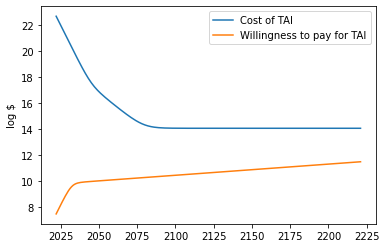

## RUN 22/10000 ##
Diagnostic: tai_flop_size=33.05706715349914, nonscaling_delay=1.8802064253181605, algo_doubling_rate=3.945440929312533, possible_algo_reduction=2.067263542830578, initial_flops_per_dollar=1.6115745375252835e+17, flops_halving_rate=4.294262367140777, max_flops_per_dollar=2.7987249227294446e+26, initial_pay=31993599.658977274, gdp_growth=1.0190818256292693, max_gdp_frac=0.00024146838990484355, willingness_ramp=1, spend_doubling_time=1.41742731174341
-
It takes 33.1 log FLOPs (~one decillion) for transformative capabilities.
Every 3.9 years algorithms get 2x better, with 2.1 log reductions possible.
FLOPs start at a cost of 17.2 log FLOPs (~100 quadrillion) per $. Every 4.3 years they get 2x cheaper, to a maximum of 26.4 log FLOPs (~100 septillion) per $.
We are willing to pay 7.5 log $ (~10 million) and this increases by 1.4x per year to a max of 0.0002% of GDP. GDP grows at a rate of 1.019x per year.
In this simulation, there are no willingness ramp effects.
If a non-

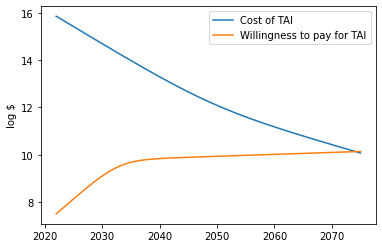

## RUN 23/10000 ##
Diagnostic: tai_flop_size=24.912089163607472, nonscaling_delay=12.169825719069076, algo_doubling_rate=2.5012936496550164, possible_algo_reduction=2.8426673138019467, initial_flops_per_dollar=1.637671344867349e+17, flops_halving_rate=2.561138267624402, max_flops_per_dollar=4.888816352980672e+21, initial_pay=36541528.78355165, gdp_growth=1.0205370193437837, max_gdp_frac=0.00034104151377872143, willingness_ramp=1, spend_doubling_time=2.0789911710893754
-
It takes 24.9 log FLOPs (~one septillion) for transformative capabilities.
Every 2.5 years algorithms get 2x better, with 2.8 log reductions possible.
FLOPs start at a cost of 17.2 log FLOPs (~100 quadrillion) per $. Every 2.6 years they get 2x cheaper, to a maximum of 21.7 log FLOPs (~one sextillion) per $.
We are willing to pay 7.6 log $ (~10 million) and this increases by 2.1x per year to a max of 0.0003% of GDP. GDP grows at a rate of 1.021x per year.
In this simulation, there are no willingness ramp effects.
If a n

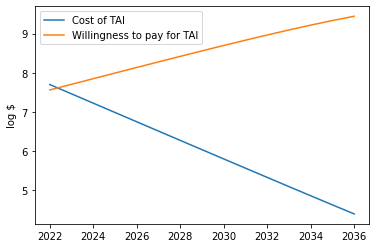

## RUN 24/10000 ##
Diagnostic: tai_flop_size=32.99920841928808, nonscaling_delay=7.069491597569892, algo_doubling_rate=1.5, possible_algo_reduction=2.3101823396083767, initial_flops_per_dollar=3.136035848025392e+17, flops_halving_rate=2.9890364538470067, max_flops_per_dollar=1.6968425535525556e+23, initial_pay=49404786.26256403, gdp_growth=1.0156406690134803, max_gdp_frac=6.19268196461964e-05, willingness_ramp=1, spend_doubling_time=1.0555746700181505
-
It takes 33.0 log FLOPs (~100 nonillion) for transformative capabilities.
Every 1.5 years algorithms get 2x better, with 2.3 log reductions possible.
FLOPs start at a cost of 17.5 log FLOPs (~100 quadrillion) per $. Every 3.0 years they get 2x cheaper, to a maximum of 23.2 log FLOPs (~100 sextillion) per $.
We are willing to pay 7.7 log $ (~10 million) and this increases by 1.1x per year to a max of 0.0001% of GDP. GDP grows at a rate of 1.016x per year.
In this simulation, there are no willingness ramp effects.
If a non-scaling delay h

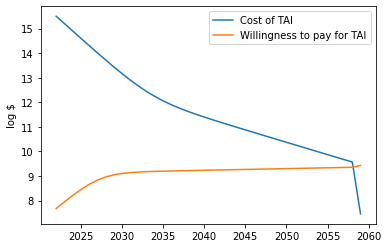

## RUN 25/10000 ##
Diagnostic: tai_flop_size=25.181118598006776, nonscaling_delay=4.221319397106698, algo_doubling_rate=3.139568923894248, possible_algo_reduction=1.9579103741087083, initial_flops_per_dollar=1.53307272274207e+17, flops_halving_rate=2.618211399093954, max_flops_per_dollar=1.5266847752023164e+25, initial_pay=32853417.276911903, gdp_growth=1.0174431323187763, max_gdp_frac=0.0007495520981926131, willingness_ramp=1, spend_doubling_time=0.6113177804237484
-
It takes 25.2 log FLOPs (~10 septillion) for transformative capabilities.
Every 3.1 years algorithms get 2x better, with 2.0 log reductions possible.
FLOPs start at a cost of 17.2 log FLOPs (~100 quadrillion) per $. Every 2.6 years they get 2x cheaper, to a maximum of 25.2 log FLOPs (~10 septillion) per $.
We are willing to pay 7.5 log $ (~10 million) and this increases by 0.6x per year to a max of 0.0007% of GDP. GDP grows at a rate of 1.017x per year.
In this simulation, there are no willingness ramp effects.
If a non-s

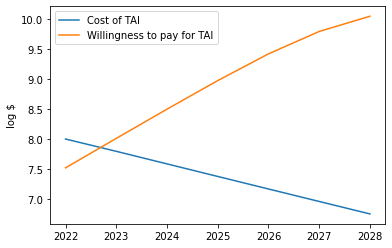

## RUN 26/10000 ##
Diagnostic: tai_flop_size=39.419882398629646, nonscaling_delay=6.57770539229803, algo_doubling_rate=3.395858913067811, possible_algo_reduction=3.3407037380642794, initial_flops_per_dollar=1.604040161574048e+17, flops_halving_rate=2.646849879913061, max_flops_per_dollar=6.751641290077703e+24, initial_pay=17106017.050366655, gdp_growth=1.0300404030496964, max_gdp_frac=0.00029458770948609657, willingness_ramp=1, spend_doubling_time=1.3095600876694309
-
It takes 39.4 log FLOPs (~one million decillion) for transformative capabilities.
Every 3.4 years algorithms get 2x better, with 3.3 log reductions possible.
FLOPs start at a cost of 17.2 log FLOPs (~100 quadrillion) per $. Every 2.6 years they get 2x cheaper, to a maximum of 24.8 log FLOPs (~one septillion) per $.
We are willing to pay 7.2 log $ (~10 million) and this increases by 1.3x per year to a max of 0.0003% of GDP. GDP grows at a rate of 1.03x per year.
In this simulation, there are no willingness ramp effects.
If

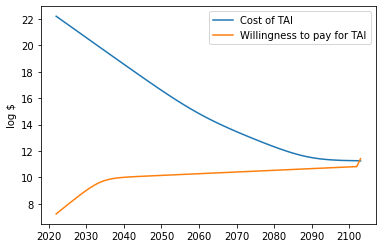

## RUN 27/10000 ##
Diagnostic: tai_flop_size=34.32384648417308, nonscaling_delay=3.9245580568866716, algo_doubling_rate=3.2879391403138993, possible_algo_reduction=3.1987813424956366, initial_flops_per_dollar=1.1633803786148357e+17, flops_halving_rate=3.106429831450578, max_flops_per_dollar=1.4732786581820288e+25, initial_pay=47461152.45786262, gdp_growth=1.018434859116358, max_gdp_frac=6.98010926314378e-05, willingness_ramp=0.8934202232585138, spend_doubling_time=1.3449001923036379
-
It takes 34.3 log FLOPs (~10 decillion) for transformative capabilities.
Every 3.3 years algorithms get 2x better, with 3.2 log reductions possible.
FLOPs start at a cost of 17.1 log FLOPs (~100 quadrillion) per $. Every 3.1 years they get 2x cheaper, to a maximum of 25.2 log FLOPs (~10 septillion) per $.
We are willing to pay 7.7 log $ (~10 million) and this increases by 1.3x per year to a max of 0.0001% of GDP. GDP grows at a rate of 1.018x per year.
In this simulation, if we are 89.0% of the way to pay

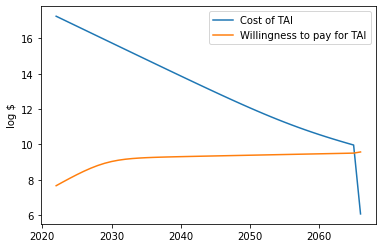

## RUN 28/10000 ##
Diagnostic: tai_flop_size=38.145482647418135, nonscaling_delay=9.75439435889295, algo_doubling_rate=2.177274477682632, possible_algo_reduction=4.8087389878540305, initial_flops_per_dollar=3.21418942241081e+17, flops_halving_rate=2.640488951705543, max_flops_per_dollar=3.49987635740997e+24, initial_pay=31861264.6635768, gdp_growth=1.0162910976672568, max_gdp_frac=0.00020078313417987354, willingness_ramp=1, spend_doubling_time=0.7479867295158028
-
It takes 38.1 log FLOPs (~100 thousand decillion) for transformative capabilities.
Every 2.2 years algorithms get 2x better, with 4.8 log reductions possible.
FLOPs start at a cost of 17.5 log FLOPs (~100 quadrillion) per $. Every 2.6 years they get 2x cheaper, to a maximum of 24.5 log FLOPs (~one septillion) per $.
We are willing to pay 7.5 log $ (~10 million) and this increases by 0.7x per year to a max of 0.0002% of GDP. GDP grows at a rate of 1.016x per year.
In this simulation, there are no willingness ramp effects.
If a

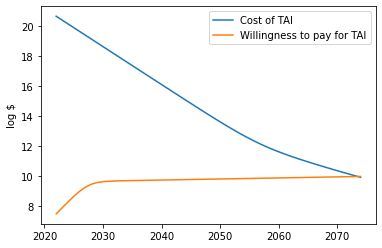

## RUN 29/10000 ##
Diagnostic: tai_flop_size=29.3547326566181, nonscaling_delay=3.5095179716895113, algo_doubling_rate=3.910622277349839, possible_algo_reduction=1.9396082370200358, initial_flops_per_dollar=2.359931935069299e+17, flops_halving_rate=2.633703966219331, max_flops_per_dollar=9.640704310699696e+26, initial_pay=51868416.21224578, gdp_growth=1.0179970419644713, max_gdp_frac=0.0008340521046386636, willingness_ramp=0.49058968892880134, spend_doubling_time=1.2597873321627036
-
It takes 29.4 log FLOPs (~100 octillion) for transformative capabilities.
Every 3.9 years algorithms get 2x better, with 1.9 log reductions possible.
FLOPs start at a cost of 17.4 log FLOPs (~100 quadrillion) per $. Every 2.6 years they get 2x cheaper, to a maximum of 27.0 log FLOPs (~100 septillion) per $.
We are willing to pay 7.7 log $ (~10 million) and this increases by 1.3x per year to a max of 0.0008% of GDP. GDP grows at a rate of 1.018x per year.
In this simulation, if we are 49.0% of the way to pa

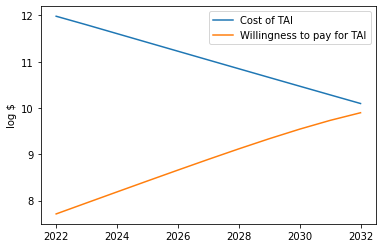

## RUN 30/10000 ##
Diagnostic: tai_flop_size=34.23866663434045, nonscaling_delay=5.706341142016529, algo_doubling_rate=2.7737152869739914, possible_algo_reduction=1.9505958672695203, initial_flops_per_dollar=2.0331814403031334e+17, flops_halving_rate=2.014975781388242, max_flops_per_dollar=2.9006506480606276e+24, initial_pay=12704975.697470933, gdp_growth=1.0247861304273993, max_gdp_frac=8.155613596728709e-05, willingness_ramp=1, spend_doubling_time=0.7860032840393343
-
It takes 34.2 log FLOPs (~10 decillion) for transformative capabilities.
Every 2.8 years algorithms get 2x better, with 2.0 log reductions possible.
FLOPs start at a cost of 17.3 log FLOPs (~100 quadrillion) per $. Every 2.0 years they get 2x cheaper, to a maximum of 24.5 log FLOPs (~one septillion) per $.
We are willing to pay 7.1 log $ (~10 million) and this increases by 0.8x per year to a max of 0.0001% of GDP. GDP grows at a rate of 1.025x per year.
In this simulation, there are no willingness ramp effects.
If a non

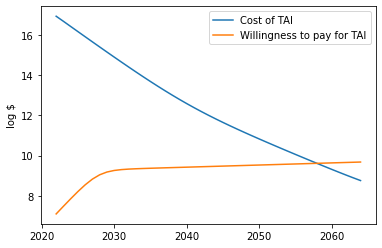

## RUN 101/10000 ##
## RUN 201/10000 ##
## RUN 301/10000 ##
## RUN 401/10000 ##
## RUN 501/10000 ##
## RUN 601/10000 ##
## RUN 701/10000 ##
## RUN 801/10000 ##
## RUN 901/10000 ##
## RUN 1001/10000 ##
## RUN 1101/10000 ##
## RUN 1201/10000 ##
## RUN 1301/10000 ##
## RUN 1401/10000 ##
## RUN 1501/10000 ##
## RUN 1601/10000 ##
## RUN 1701/10000 ##
## RUN 1801/10000 ##
## RUN 1901/10000 ##
## RUN 2001/10000 ##
## RUN 2101/10000 ##
## RUN 2201/10000 ##
## RUN 2301/10000 ##
## RUN 2401/10000 ##
## RUN 2501/10000 ##
## RUN 2601/10000 ##
## RUN 2701/10000 ##
## RUN 2801/10000 ##
## RUN 2901/10000 ##
## RUN 3001/10000 ##
## RUN 3101/10000 ##
## RUN 3201/10000 ##
## RUN 3301/10000 ##
## RUN 3401/10000 ##
## RUN 3501/10000 ##
## RUN 3601/10000 ##
## RUN 3701/10000 ##
## RUN 3801/10000 ##
## RUN 3901/10000 ##
## RUN 4001/10000 ##
## RUN 4101/10000 ##
## RUN 4201/10000 ##
## RUN 4301/10000 ##
## RUN 4401/10000 ##
## RUN 4501/10000 ##
## RUN 4601/10000 ##
## RUN 4701/10000 ##
## RUN 4801/10000 ##
#

In [495]:
tai_years = []
tai_flop_size_log_ = []
plt.ioff()
print('Running')

for r in range(RUNS):
    print_diagnostic = r < 30
    if print_diagnostic or r % 100 == 0 or r >= RUNS - 1:
        print('## RUN {}/{} ##'.format(r + 1, RUNS))
    if print_diagnostic:
        cost_of_tai_collector = []
        willingness_collector = []
    
    tai_flop_size_ = sample(tai_flop_size)
    tai_flop_size_log_.append(tai_flop_size_)
    algo_doubling_rate_ = sample(algo_doubling_rate)
    possible_algo_reduction_ = possible_algo_reduction_fn(sample(min_reduction),
                                                          sample(max_reduction),
                                                          tai_flop_size_)
    initial_flops_per_dollar_ = 10 ** sample(initial_flops_per_dollar)
    flops_halving_rate_ = sample(flops_halving_rate)
    max_flops_per_dollar_ = 10 ** sample(max_flops_per_dollar)
    initial_pay_ = 10 ** sample(initial_pay)
    gdp_growth_ = sample(gdp_growth)
    max_gdp_frac_ = sample(max_gdp_frac)
    
    willingness_ramp_happens = event_occurs(p_willingness_ramp)
    if willingness_ramp_happens:
        willingness_ramp_ = sample(willingness_ramp)
    else:
        willingness_ramp_ = 1
        
    spend_doubling_time_ = sample(spend_doubling_time)
    nonscaling_delay_ = sample(nonscaling_delay)
    initial_chance_of_nonscaling_issue_ = initial_chance_of_nonscaling_issue
    final_chance_of_nonscaling_issue_ = final_chance_of_nonscaling_issue
    
    if print_diagnostic:
        diagnostic = 'Diagnostic: tai_flop_size={}, nonscaling_delay={}, algo_doubling_rate={}, '
        diagnostic += 'possible_algo_reduction={}, initial_flops_per_dollar={}, flops_halving_rate={}, '
        diagnostic += 'max_flops_per_dollar={}, initial_pay={}, gdp_growth={}, max_gdp_frac={}, '
        diagnostic += 'willingness_ramp={}, spend_doubling_time={}'
        print(diagnostic.format(tai_flop_size_, nonscaling_delay_, algo_doubling_rate_,
                                possible_algo_reduction_, initial_flops_per_dollar_, flops_halving_rate_,
                                max_flops_per_dollar_, initial_pay_, gdp_growth_, max_gdp_frac_,
                                willingness_ramp_, spend_doubling_time_))
        print('-')

        print('It takes {} log FLOPs (~{}) for transformative capabilities.'.format(np.round(tai_flop_size_, 1),
                                                                                    numerize(tai_flop_size_)))
        print('Every {} years algorithms get 2x better, with {} log reductions possible.'.format(np.round(algo_doubling_rate_, 1),
                                                                                                 np.round(possible_algo_reduction_, 1)))
        print(('FLOPs start at a cost of {} log FLOPs (~{}) per $. Every {} years they get ' +
               '2x cheaper, to a maximum of {} log FLOPs (~{}) per $.').format(np.round(math.log10(initial_flops_per_dollar_), 1),
                                                                               numerize(math.log10(initial_flops_per_dollar_)),
                                                                               np.round(flops_halving_rate_, 1),
                                                                               np.round(math.log10(max_flops_per_dollar_), 1),
                                                                               numerize(math.log10(max_flops_per_dollar_))))
        print(('We are willing to pay {} log $ (~{}) and this increases by {}x per year to a max of {}% of GDP. ' +
               'GDP grows at a rate of {}x per year.').format(np.round(math.log10(initial_pay_), 1),
                                                              numerize(math.log10(initial_pay_)),
                                                              np.round(spend_doubling_time_, 1),
                                                              np.round(max_gdp_frac_, 4),
                                                              np.round(gdp_growth_, 3)))
        if willingness_ramp_ < 1:
            print('In this simulation, if we are {}% of the way to paying for TAI, we will ramp to paying for TAI.'.format(np.round(willingness_ramp_ * 100)))
        else:
            print('In this simulation, there are no willingness ramp effects.')
            
        print(('If a non-scaling delay happens, it will take an additional {} years to produce TAI due' +
               ' to issues unrelated to scaling FLOP').format(np.round(nonscaling_delay_, 1)))
        print('---')
    
    tai_created = False
    is_nonscaling_issue = None
    recursive = False
    for y in years:
        if not tai_created:  
            flops_needed_ = flops_needed(initial_flops=10 ** tai_flop_size_,
                                         doubling_rate=algo_doubling_rate_,
                                         possible_reduction=10 ** possible_algo_reduction_,
                                         year=(y - CURRENT_YEAR))
            flops_per_dollar_ = flops_per_dollar(initial_flops_per_dollar=initial_flops_per_dollar_,
                                                 max_flops_per_dollar=max_flops_per_dollar_,
                                                 halving_rate=flops_halving_rate_,
                                                 year=(y - CURRENT_YEAR))
            
            if flops_per_dollar_ > 10 ** 200:
                flops_needed_ = int(flops_needed_)
                flops_per_dollar_ = int(flops_per_dollar_)
                
            cost_of_tai_ = flops_needed_ / flops_per_dollar_
            willingness_ = willingness_to_pay(initial_gdp=initial_gdp,
                                              gdp_growth=gdp_growth_,
                                              initial_pay=initial_pay_,
                                              spend_doubling_time=spend_doubling_time_,
                                              max_gdp_frac=max_gdp_frac_,
                                              year=(y - CURRENT_YEAR))
            
            if flops_per_dollar_ > 10 ** 200:
                willingness_ = int(willingness_)
            if willingness_ > 10 ** 200:
                flops_per_dollar_ = int(flops_per_dollar_)
            
            total_compute_ = willingness_ * flops_per_dollar_
            p_recursive = p_rapid_recursive_self_improvement(flops_needed_,
                                                             total_compute_,
                                                             base_p_recursive,
                                                             recursive_curve_steepness,
                                                             recursive_curve_inflection)
            p_recursive = p_recursive / 8 # Attempt to turn CDF into PDF (approximation)
            
            cost_of_tai_collector.append(cost_of_tai_)
            willingness_collector.append(willingness_)
            
            if print_diagnostic:
                out_str = ('Year: {} - {} max log FLOP ({}) available - TAI takes {} log FLOP ({}) - ' +
                           'log $ {} to buy TAI ({}) vs. willingness to pay log $ {} ({}) - {} log FLOPS per $ ({})')
                print(out_str.format(y,
                                     np.round(math.log10(total_compute_), 1),
                                     numerize(math.log10(total_compute_)),
                                     np.round(math.log10(flops_needed_), 1),
                                     numerize(math.log10(flops_needed_)),
                                     np.round(math.log10(cost_of_tai_), 1),
                                     numerize(math.log10(cost_of_tai_)),
                                     np.round(math.log10(willingness_), 1),
                                     numerize(math.log10(willingness_)),
                                     np.round(math.log10(flops_per_dollar_), 1),
                                     numerize(math.log10(flops_per_dollar_))))
            
            if cost_of_tai_ * willingness_ramp_ <= willingness_:
                if is_nonscaling_issue is None:
                    p_nonscaling_delay_ = p_nonscaling_delay(initial_chance_of_nonscaling_issue,
                                                             final_chance_of_nonscaling_issue,
                                                             year=y,
                                                             max_year=nonscaling_issue_bottom_year)
                    r_ = random.random()
                    is_nonscaling_issue = r_ < p_nonscaling_delay_
                    nonscaling_countdown = nonscaling_delay_
                    if print_diagnostic:
                        print('-- {} p_nonscaling_issue={} r_={}'.format('Nonscaling delay occured' if is_nonscaling_issue else 'Nonscaling issue did not occur',
                                                                         np.round(p_nonscaling_delay_, 4),
                                                                         np.round(r_, 4)))
                
                if not is_nonscaling_issue or nonscaling_countdown <= 0.1:
                    if print_diagnostic:
                        print('--- /!\ TAI CREATED in {}'.format(y))
                        plot_tai(plt, years, cost_of_tai_collector, willingness_collector).show()
                    tai_years.append(y)
                    tai_created = True
                else:
                    if print_diagnostic:
                        print('/!\ FLOPs for TAI sufficient but needs {} more years to solve non-scaling issues'.format(np.round(nonscaling_countdown, 1)))
                    nonscaling_countdown -= 1
            
            r_ = random.random()
            if not tai_created and not is_nonscaling_issue and not recursive and r_ < p_recursive:
                flops_halving_rate__ = sample(recursive_flops_halving_rate)
                flops_halving_rate_ = flops_halving_rate__ if flops_halving_rate__ < flops_halving_rate_ else flops_halving_rate_
                algo_doubling_rate__ = sample(recursive_algo_doubling_rate)
                algo_doubling_rate_ = algo_doubling_rate__ if algo_doubling_rate__ < algo_doubling_rate_ else algo_doubling_rate_
                spend_doubling_time__ = sample(recursive_spend_doubling_time)
                spend_doubling_time_ = spend_doubling_time__ if spend_doubling_time__ < spend_doubling_time_ else spend_doubling_time_
                gdp_growth__ = sample(recursive_gdp_growth)
                gdp_growth_ = gdp_growth__ if gdp_growth__ > gdp_growth_ else gdp_growth_
                initial_chance_of_nonscaling_issue_ = recursive_initial_chance_of_nonscaling_issue
                final_chance_of_nonscaling_issue_ = recursive_final_chance_of_nonscaling_issue
                recursive = True
                # TODO: fix issue where this changes the variables as of 2022 rather than as of the time of the rapid recursion

                if print_diagnostic:
                    print(('--- rapid recursive loop (ratio={} p={}, r_={}) - set flops_having_rate={}, ' +
                           'algo_doubling_rate={} spend_doubling_time={}, gdp_growth={}, initial_chance_of_nonscaling_issue={} ' +
                           'final_chance_of_nonscaling_issue={}').format(total_compute_ / flops_needed_,
                                                                         p_recursive,
                                                                         r_,
                                                                         flops_halving_rate_,
                                                                         algo_doubling_rate_,
                                                                         spend_doubling_time_,
                                                                         gdp_growth_,
                                                                         initial_chance_of_nonscaling_issue,
                                                                         final_chance_of_nonscaling_issue))
                if event_occurs(p_recursive_creates_tai_instantly):
                    if print_diagnostic:
                        print('--- /!\ RRSI LOOP CREATES TAI in {}'.format(y))
                        plot_tai(plt, years, cost_of_tai_collector, willingness_collector).show()
                    tai_years.append(y)
                    tai_created = True
                        
            elif not tai_created and not is_nonscaling_issue and not recursive and print_diagnostic:
                print('--- no rapid recursive loop (ratio={}, p={}, r_={})'.format(round(total_compute_ / flops_needed_, 3),
                                                                                   p_recursive,
                                                                                   r_))
                
    if not tai_created:
        if print_diagnostic:
            print('--- :/ TAI NOT CREATED BEFORE {}'.format(MAX_YEAR + 1))
            plot_tai(plt, years, cost_of_tai_collector, willingness_collector).show()
        tai_years.append(MAX_YEAR + 1)


In [496]:
out = get_percentiles(tai_years)
[str(o[0]) + '%: ' + (str(int(o[1])) if o[1] < MAX_YEAR else '>' + str(MAX_YEAR)) for o in out.items()]

# NOTE: Ajeya's numbers should output something very close to:
# '5%': 2027,
# '10%: 2031',
# '20%: 2037',
# '30%: 2042',
# '40%: 2047',
# '50%: 2053',
# '60%: 2061',
# '70%: 2073',
# '80%: >2100',
# '90%: >2100',
# '95%: >2100'

# My latest numbers (2022 Jul 29 1:23AM CT):
#['5%: 2029',
# '10%: 2033',
# '20%: 2041',
# '30%: 2048',
# '40%: 2057',
# '50%: 2065',
# '60%: 2075',
# '70%: 2092',
# '80%: 2136',
# '90%: >2222',
# '95%: >2222']


['5%: 2029',
 '10%: 2033',
 '20%: 2041',
 '30%: 2048',
 '40%: 2057',
 '50%: 2065',
 '60%: 2075',
 '70%: 2092',
 '80%: 2136',
 '90%: >2222',
 '95%: >2222']

In [497]:
[str(o[0]) + '%: ' + (str(int(o[1]) - CURRENT_YEAR) if o[1] < MAX_YEAR else '>' + str(MAX_YEAR - CURRENT_YEAR)) + ' years from now' for o in out.items()]


['5%: 7 years from now',
 '10%: 11 years from now',
 '20%: 19 years from now',
 '30%: 26 years from now',
 '40%: 35 years from now',
 '50%: 43 years from now',
 '60%: 53 years from now',
 '70%: 70 years from now',
 '80%: 114 years from now',
 '90%: >200 years from now',
 '95%: >200 years from now']

In [498]:
def print_chance_tai_by_year(data, year_target):
    return '{}% chance of TAI by EOY {}'.format(int(np.round(sum([1 if y <= year_target else 0 for y in data]) / len(data) * 100, 0)),
                                                year_target)
    
print('## Within <2 years')
print_chance_tai_by_year(tai_years, 2023)


## Within <2 years


'1% chance of TAI by EOY 2023'

In [499]:
print_chance_tai_by_year(tai_years, 2024)

'1% chance of TAI by EOY 2024'

In [500]:
print_chance_tai_by_year(tai_years, 2025)

'2% chance of TAI by EOY 2025'

In [501]:
print('## Within 5 years')
print_chance_tai_by_year(tai_years, 2027)

## Within 5 years


'4% chance of TAI by EOY 2027'

In [502]:
print_chance_tai_by_year(tai_years, 2029)

'5% chance of TAI by EOY 2029'

In [503]:
print_chance_tai_by_year(tai_years, 2030)

'7% chance of TAI by EOY 2030'

In [504]:
print('## Within 10 years')
print_chance_tai_by_year(tai_years, 2032)

## Within 10 years


'9% chance of TAI by EOY 2032'

In [505]:
# Holden benchmarks from https://www.cold-takes.com/biological-anchors-is-about-bounding-not-pinpointing-ai-timelines/#bio-anchors-as-a-way-of-bounding-ai-timelines
print('## Within 14 years (Holden benchmark - 10%-50%, Holden: 10%)')
print_chance_tai_by_year(tai_years, 2036)


## Within 14 years (Holden benchmark - 10%-50%, Holden: 10%)


'14% chance of TAI by EOY 2036'

In [506]:
print('## Within 15 years')
print_chance_tai_by_year(tai_years, 2037)

## Within 15 years


'16% chance of TAI by EOY 2037'

In [507]:
print_chance_tai_by_year(tai_years, 2040)

'20% chance of TAI by EOY 2040'

In [508]:
print('## Within 20 years')
print_chance_tai_by_year(tai_years, 2042)

## Within 20 years


'23% chance of TAI by EOY 2042'

In [509]:
print('## Within 25 years')
print_chance_tai_by_year(tai_years, 2047)

## Within 25 years


'29% chance of TAI by EOY 2047'

In [510]:
print_chance_tai_by_year(tai_years, 2050)

'33% chance of TAI by EOY 2050'

In [511]:
print_chance_tai_by_year(tai_years, 2060)

'45% chance of TAI by EOY 2060'

In [512]:
print('## Within 38 years (Holden benchmark - 25%-75%, Holden: 50%)')
print_chance_tai_by_year(tai_years, 2060)

## Within 38 years (Holden benchmark - 25%-75%, Holden: 50%)


'45% chance of TAI by EOY 2060'

In [513]:
print('## Within 48 years (Carlsmith benchmark - Carlsmith: 50%)')
print_chance_tai_by_year(tai_years, 2070)

## Within 48 years (Carlsmith benchmark - Carlsmith: 50%)


'56% chance of TAI by EOY 2070'

In [514]:
print('## Within 50 years')
print_chance_tai_by_year(tai_years, 2072)

## Within 50 years


'58% chance of TAI by EOY 2072'

In [515]:
print('## Within my personal expected lifespan')
print_chance_tai_by_year(tai_years, 2078)

## Within my personal expected lifespan


'62% chance of TAI by EOY 2078'

In [516]:
print('## Within 75 years')
print_chance_tai_by_year(tai_years, 2097)

## Within 75 years


'73% chance of TAI by EOY 2097'

In [517]:
print('## Within 78 years (Holden benchmark - 33%-90%, Holden: 66%)')
print_chance_tai_by_year(tai_years, 2100)

## Within 78 years (Holden benchmark - 33%-90%, Holden: 66%)


'74% chance of TAI by EOY 2100'

In [518]:
print('## Within 100 years')
print_chance_tai_by_year(tai_years, 2122)

## Within 100 years


'78% chance of TAI by EOY 2122'

In [519]:
print('## Within 200 years')
print_chance_tai_by_year(tai_years, 2222)

## Within 200 years


'86% chance of TAI by EOY 2222'

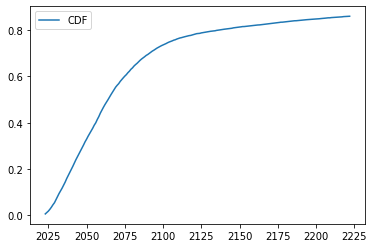

In [520]:
tai_years_ = np.array([MAX_YEAR + 1 if t > MAX_YEAR else t for t in tai_years])
count, bins_count = np.histogram(tai_years_, bins=(MAX_YEAR - CURRENT_YEAR))
pdf = count / sum(count)
cdf = np.cumsum(pdf)
bins = np.round(np.array([b for b in bins_count[1:] if b <= MAX_YEAR]))

plt.plot(bins, cdf[:len(bins)], label='CDF')
plt.legend()

<string>:192: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
<string>:193: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#d

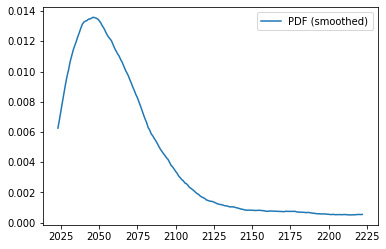

In [521]:
pdf_smoothed = savitzky_golay(pdf[:len(bins)], 51, 3) # window size 51, polynomial order 3
plt.plot(bins, pdf_smoothed, label='PDF (smoothed)')
plt.legend()
plt.show()

In [522]:
cdf[:len(bins)]

array([0.0063, 0.0123, 0.0184, 0.0263, 0.0354, 0.0457, 0.0546, 0.0678,
       0.0814, 0.0944, 0.1058, 0.1176, 0.1309, 0.1437, 0.1589, 0.172 ,
       0.1855, 0.1987, 0.2117, 0.2262, 0.24  , 0.2526, 0.2659, 0.2782,
       0.2912, 0.3036, 0.3174, 0.3289, 0.3417, 0.3533, 0.3645, 0.3761,
       0.3892, 0.3995, 0.4139, 0.4263, 0.4414, 0.4541, 0.4663, 0.478 ,
       0.4884, 0.4992, 0.5105, 0.5217, 0.5321, 0.5427, 0.5533, 0.5614,
       0.5685, 0.5782, 0.5863, 0.5937, 0.601 , 0.6074, 0.6156, 0.6222,
       0.6305, 0.6364, 0.6444, 0.6506, 0.6561, 0.663 , 0.6693, 0.675 ,
       0.6798, 0.6849, 0.6904, 0.6942, 0.6993, 0.7044, 0.709 , 0.7128,
       0.7174, 0.7217, 0.7256, 0.729 , 0.7325, 0.7354, 0.7382, 0.7415,
       0.7451, 0.7481, 0.7505, 0.7531, 0.7561, 0.7579, 0.7609, 0.7633,
       0.7655, 0.7669, 0.7689, 0.7706, 0.7722, 0.7738, 0.7756, 0.7765,
       0.7785, 0.7801, 0.7823, 0.7842, 0.7855, 0.7874, 0.7886, 0.7896,
       0.7912, 0.7926, 0.7932, 0.7943, 0.7953, 0.7959, 0.7966, 0.7983,
      

In [523]:
pdf[:len(bins)]

array([0.0063, 0.006 , 0.0061, 0.0079, 0.0091, 0.0103, 0.0089, 0.0132,
       0.0136, 0.013 , 0.0114, 0.0118, 0.0133, 0.0128, 0.0152, 0.0131,
       0.0135, 0.0132, 0.013 , 0.0145, 0.0138, 0.0126, 0.0133, 0.0123,
       0.013 , 0.0124, 0.0138, 0.0115, 0.0128, 0.0116, 0.0112, 0.0116,
       0.0131, 0.0103, 0.0144, 0.0124, 0.0151, 0.0127, 0.0122, 0.0117,
       0.0104, 0.0108, 0.0113, 0.0112, 0.0104, 0.0106, 0.0106, 0.0081,
       0.0071, 0.0097, 0.0081, 0.0074, 0.0073, 0.0064, 0.0082, 0.0066,
       0.0083, 0.0059, 0.008 , 0.0062, 0.0055, 0.0069, 0.0063, 0.0057,
       0.0048, 0.0051, 0.0055, 0.0038, 0.0051, 0.0051, 0.0046, 0.0038,
       0.0046, 0.0043, 0.0039, 0.0034, 0.0035, 0.0029, 0.0028, 0.0033,
       0.0036, 0.003 , 0.0024, 0.0026, 0.003 , 0.0018, 0.003 , 0.0024,
       0.0022, 0.0014, 0.002 , 0.0017, 0.0016, 0.0016, 0.0018, 0.0009,
       0.002 , 0.0016, 0.0022, 0.0019, 0.0013, 0.0019, 0.0012, 0.001 ,
       0.0016, 0.0014, 0.0006, 0.0011, 0.001 , 0.0006, 0.0007, 0.0017,
      

<string>:192: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
<string>:193: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#d

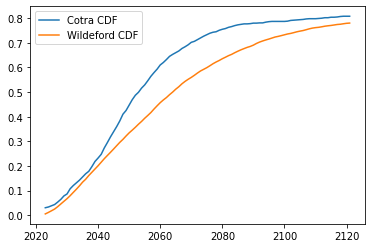

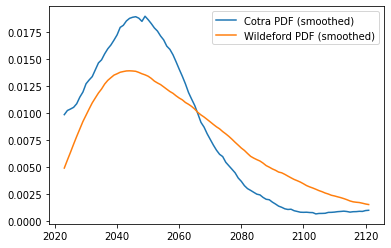

In [524]:
ajeya_cdf = [0.03 , 0.033, 0.038, 0.043, 0.053, 0.064, 0.078, 0.086, 0.107, 0.12 , 0.131, 0.142, 0.155, 0.168, 0.178,
             0.197, 0.218, 0.232, 0.247, 0.273, 0.295, 0.318, 0.339, 0.36 , 0.383, 0.41 , 0.425, 0.447, 0.469, 0.487,
             0.499, 0.516, 0.529, 0.546, 0.564, 0.579, 0.593, 0.61 , 0.62 , 0.632, 0.645, 0.653, 0.66 , 0.667, 0.677,
             0.684, 0.692, 0.702, 0.706, 0.713, 0.72 , 0.727, 0.733, 0.739, 0.743, 0.745, 0.751, 0.755, 0.758, 0.763,
             0.766, 0.77 , 0.773, 0.775, 0.777, 0.777, 0.778, 0.78 , 0.78 , 0.781, 0.781, 0.784, 0.786, 0.787, 0.787,
             0.787, 0.787, 0.787, 0.788, 0.791, 0.792, 0.793, 0.794, 0.795, 0.797, 0.798, 0.798, 0.798, 0.799, 0.8  ,
             0.802, 0.802, 0.804, 0.804, 0.805, 0.807, 0.808, 0.808, 0.808]
ajeya_pdf = np.append(np.array(ajeya_cdf[0]), np.diff(ajeya_cdf[:len(bins)]))
ajeya_pdf_smoothed = savitzky_golay(ajeya_pdf[:len(bins)], 51, 3)

peter_cdf = [0.0049, 0.011 , 0.0177, 0.0246, 0.0344, 0.0453, 0.0561, 0.0668,
       0.0789, 0.0921, 0.1051, 0.1189, 0.1338, 0.1458, 0.1608, 0.1741,
       0.1874, 0.2006, 0.2149, 0.2293, 0.2424, 0.2553, 0.2686, 0.2823,
       0.2958, 0.3078, 0.3214, 0.3342, 0.3453, 0.3569, 0.3693, 0.3807,
       0.3934, 0.4049, 0.4168, 0.4309, 0.4441, 0.4568, 0.4678, 0.4776,
       0.4893, 0.4998, 0.5116, 0.5217, 0.5335, 0.5433, 0.5518, 0.5595,
       0.5681, 0.5773, 0.5858, 0.5924, 0.5991, 0.6069, 0.6151, 0.6221,
       0.6283, 0.6354, 0.6415, 0.6479, 0.6531, 0.6598, 0.6659, 0.6716,
       0.6766, 0.6815, 0.6854, 0.6906, 0.6975, 0.7031, 0.7076, 0.7117,
       0.7154, 0.7195, 0.7236, 0.7262, 0.7293, 0.7326, 0.7359, 0.7382,
       0.7414, 0.7448, 0.7475, 0.7499, 0.7533, 0.7569, 0.7598, 0.7617,
       0.763 , 0.7651, 0.7675, 0.7692, 0.7706, 0.7725, 0.7745, 0.7755,
       0.7775, 0.7793, 0.7802, 0.7819, 0.7835, 0.7852, 0.7862, 0.7878,
       0.7892, 0.7908, 0.7921, 0.7931, 0.7944, 0.7958, 0.7967, 0.7974,
       0.798 , 0.7989, 0.7995, 0.8001, 0.8012, 0.8019, 0.8028, 0.8046,
       0.8054, 0.8067, 0.8082, 0.8089, 0.81  , 0.8104, 0.8111, 0.8119,
       0.8122, 0.813 , 0.814 , 0.8154, 0.8161, 0.8163, 0.8172, 0.8177,
       0.8186, 0.8195, 0.8199, 0.8206, 0.8216, 0.8224, 0.8229, 0.8234,
       0.8241, 0.8248, 0.8256, 0.8268, 0.8278, 0.8282, 0.8289, 0.8297,
       0.8299, 0.8302, 0.8306, 0.8312, 0.8316, 0.8324, 0.833 , 0.8336,
       0.8343, 0.8349, 0.8355, 0.8361, 0.8365, 0.8374, 0.8381, 0.8388,
       0.8393, 0.8398, 0.8405, 0.841 , 0.8416, 0.8417, 0.8424, 0.8428,
       0.8433, 0.8442, 0.8448, 0.8452, 0.8457, 0.8464, 0.847 , 0.8476,
       0.848 , 0.8486, 0.8492, 0.8498, 0.8505, 0.851 , 0.8518, 0.8525,
       0.8535, 0.8541, 0.8551, 0.8559, 0.8566, 0.857 , 0.8574]
peter_pdf = np.append(np.array(peter_cdf[0]), np.diff(peter_cdf[:len(bins)]))
peter_pdf_smoothed = savitzky_golay(peter_pdf[:len(bins)], 51, 3)

plt.plot(bins[:99], ajeya_cdf[:99], label='Cotra CDF')
plt.plot(bins[:99], peter_cdf[:99], label='Wildeford CDF')
plt.legend()
plt.show()

plt.plot(bins[:99], ajeya_pdf_smoothed[:99], label='Cotra PDF (smoothed)')
plt.plot(bins[:99], peter_pdf_smoothed[:99], label='Wildeford PDF (smoothed)')
plt.legend()
plt.show()